<div style="display: flex; background-color: RGB(150,160,150);" >
<h1 style="margin: auto; padding: 30px; ">Analyse Des Groupements De Pays Pour Exportation des Poulets de La Poule Qui Chante 
</h1>
</div>

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import decomposition, preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering

import seaborn as sns

In [2]:
#On 'charge' seaborn :
sns.set()

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [3]:
#Importation du fichier data_export_notebook.csv
data_export_notebook = pd.read_csv("data_export_notebook.csv", sep=',', encoding='latin-1')

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Préparation des Données pour Analyse</h2>
</div>

In [4]:
data_export_notebook = data_export_notebook.rename(columns={'Unnamed: 0': 'Pays'})

In [5]:
data_export_notebook = data_export_notebook.set_index('Pays')

In [6]:
print(data_export_notebook.info())
data_export_notebook.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, Afrique du Sud to Îles Salomon
Data columns (total 32 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Croissance du PIB (% annuel)                                                    119 non-null    float64
 1   Croissance du PIB par habitant (% annuel)                                       119 non-null    float64
 2   Facteur de conversion PPA, PIB (unités de devises locales par $ international)  119 non-null    float64
 3   Importations de biens et de services (% du PIB)                                 119 non-null    float64
 4   Inflation, déflateur du PIB (% annuel)                                          119 non-null    float64
 5   PIB ($ US courants)                                                             119 non-null    float64
 6   P

Croissance du PIB (% annuel)  \
count                    119.000000   
mean                       3.842962   
std                        5.052114   
min                      -28.758591   
25%                        2.457771   
50%                        4.118004   
75%                        5.714180   
max                       20.016464   

       Croissance du PIB par habitant (% annuel)  \
count                                 119.000000   
mean                                    3.007231   
std                                     4.526925   
min                                   -21.747358   
25%                                     1.380080   
50%                                     2.950326   
75%                                     5.066004   
max                                    19.350915   

       Facteur de conversion PPA, PIB (unités de devises locales par $ international)  \
count                                         119.000000                                
mean                                          912.483311                                
std                                          6579.449599                                
min                                             0.338918                                
25%                                             0.858220                                
50%                                             6.679761                                
75%                                           125.496810                                
max                                         71026.728481                                

       Importations de biens et de services (% du PIB)  \
count                                       119.000000   
mean                                         50.946895   
std                                          26.947904   
min                                           1.127673   
25%                                          30.406540   
50%                                          47.809195   
75%                                          64.111015   
max                                         177.235463   

       Inflation, déflateur du PIB (% annuel)  PIB ($ US courants)  \
count                              119.000000         1.190000e+02   
mean                                14.959920         7.999567e+11   
std                                 29.417163         2.923076e+12   
min                                  0.333980         8.329452e+08   
25%                                  5.282805         1.921493e+10   
50%                                  7.653820         7.426336e+10   
75%                                 12.778191         4.655368e+11   
max                                264.580608         2.574411e+13   

       PIB par habitant ($ US courants)  \
count                        119.000000   
mean                       18442.556660   
std                        24712.511851   
min                          259.025031   
25%                         2589.897498   
50%                         7018.051504   
75%                        24797.005558   
max                       125006.021815   

       PIB par habitant, ($ PPA internationaux courants)  \
count                                         119.000000   
mean                                        29710.020021   
std                                         27972.603671   
min                                           917.506035   
25%                                          7380.258539   
50%                                         21055.663030   
75%                                         45602.435133   
max                                        146457.020544   

       PIB, ($ PPA internationaux courants)  \
count                          1.190000e+02   
mean                           1.343703e+12   
std                            3.994048e+12   
min                            1.046750e+09   
25%                            5.520934e+10   
50%                

In [7]:
data_export_notebook.drop(columns=['Croissance du PIB (% annuel)',
                                   'Facteur de conversion PPA, PIB (unités de devises locales par $ international)',
                                   "Inflation, déflateur du PIB (% annuel)",
                                   "PIB ($ US courants)",
                                  "PIB, ($ PPA internationaux courants)",
                                  "Rank: Trading across borders",
                                  "Time to import: Border compliance (hours)",
                                  "Time to import: Documentary compliance (hours)",
                                  "Cost to import: Border compliance (USD)",
                                  "Cost to import: Documentary compliance (USD)",
                                  "Unités de monnaie locale par USD",
                                  "Terr. agricoles sous agriculture biologique",
                                  "Terres agricoles",
                                  "Stocks d'ouverture",
                                  "Variation de stock",
                                  "Importations de biens et de services (% du PIB)",
                                  "PIB par habitant ($ US courants)",
                                  "Trading across borders (score)",
                                  "Importations - Valeur (US$)",
                                  "Disponibilité alimentaire (Kcal/personne/jour)"], inplace=True)

In [8]:
# Création d'une nouvelle colonne 'mean_score_Trading' qui est la moyenne de 'Cost to import: Border compliance (USD) (score)', 'Cost to import: Documentary compliance (USD) (score)', 'Time to import: Border compliance (hours) (score)' et 'Time to import: Documentary compliance (hours) (score)'
data_export_notebook['mean_score_Trading'] = data_export_notebook[['Cost to import: Border compliance (USD) (score)', 'Cost to import: Documentary compliance (USD) (score)', 'Time to import: Border compliance (hours) (score)', 'Time to import: Documentary compliance (hours) (score)']].mean(axis=1)

data_export_notebook.drop(columns=['Cost to import: Border compliance (USD) (score)',
                                  "Cost to import: Documentary compliance (USD) (score)",
                                  'Time to import: Border compliance (hours) (score)',
                                  'Time to import: Documentary compliance (hours) (score)'], inplace=True)

In [9]:
data_export_notebook['Importations - Quantité (tonnes/hab)'] = data_export_notebook['Importations - Quantité (tonnes)']/data_export_notebook['Population']

In [10]:
#data_export_notebook['Importations - Valeur (US$/hab)'] = data_export_notebook['Importations - Valeur (US$)']/data_export_notebook['Population']

In [11]:
data_export_notebook['Disponibilité alimentaire en quantité (tonnes/hab)'] = data_export_notebook['Disponibilité alimentaire en quantité (tonnes)']/data_export_notebook['Population']

In [12]:
data_export_notebook['Production (/hab)'] = data_export_notebook['Production']/data_export_notebook['Population']

In [13]:
data_export_notebook.drop(columns=['Importations - Quantité (tonnes)',
                                  'Disponibilité alimentaire en quantité (tonnes)',
                                  'Production',
                                  "Population"], inplace=True)

In [14]:
data_export_notebook.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, Afrique du Sud to Îles Salomon
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Croissance du PIB par habitant (% annuel)                        119 non-null    float64
 1   PIB par habitant, ($ PPA internationaux courants)                119 non-null    float64
 2   Political Stability and Absence of Violence/Terrorism: Estimate  119 non-null    float64
 3   Pourcentage terre agricoles BIO                                  119 non-null    float64
 4   mean_score_Trading                                               119 non-null    float64
 5   Importations - Quantité (tonnes/hab)                             119 non-null    float64
 6   Disponibilité alimentaire en quantité (tonnes/hab)               119 non-null    float64
 7   Production (/hab)           

In [15]:
#Suppression de Samoa qui a une contribution 5 fois plus importante que les autres pays dans l'analyse
data_export_notebook = data_export_notebook.drop(index="Samoa")

In [16]:
data_export_notebook.loc["Bahamas"] 

Croissance du PIB par habitant (% annuel)                             10.220516
PIB par habitant, ($ PPA internationaux courants)                  33637.504798
Political Stability and Absence of Violence/Terrorism: Estimate        0.881239
Pourcentage terre agricoles BIO                                        0.376923
mean_score_Trading                                                    50.353842
Importations - Quantité (tonnes/hab)                                   0.043075
Disponibilité alimentaire en quantité (tonnes/hab)                     0.054913
Production (/hab)                                                      0.014861
Name: Bahamas, dtype: float64

In [17]:
data_export_notebook.loc["France"] 

Croissance du PIB par habitant (% annuel)                              2.142732
PIB par habitant, ($ PPA internationaux courants)                  57594.034018
Political Stability and Absence of Violence/Terrorism: Estimate        0.393339
Pourcentage terre agricoles BIO                                       10.160939
mean_score_Trading                                                   100.000000
Importations - Quantité (tonnes/hab)                                   0.007415
Disponibilité alimentaire en quantité (tonnes/hab)                     0.017952
Production (/hab)                                                      0.017270
Name: France, dtype: float64

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.1 - Data Split</h3>
</div>

In [18]:
#Récupération des valeurs des données
X = data_export_notebook.values
X[:5]


array([[ 1.05687468e+00,  1.53307693e+04, -6.81386352e-01,
         4.64693121e-02,  7.19423450e+01,  4.89529519e-03,
         3.95674487e-02,  3.28494010e-02],
       [ 6.13901679e+00,  1.94927831e+04,  1.06261313e-01,
         6.16414230e-02,  9.64937700e+01,  1.51064241e-02,
         2.08287462e-02,  5.72232206e-03],
       [ 1.07495189e+00,  6.66160222e+04,  6.28491879e-01,
         9.67460078e+00,  1.00000000e+02,  5.92267431e-03,
         1.10274149e-02,  1.29003555e-02],
       [ 6.13262665e+00,  5.42516379e+04, -3.55806291e-01,
         1.34274055e-02,  7.11833175e+01,  1.42890126e-02,
         4.52185575e-02,  3.14321990e-02],
       [ 3.98913108e+00,  2.90374891e+04, -9.85943303e-02,
         3.02906955e+00,  4.81681325e+01,  2.25685661e-04,
         4.73733735e-02,  5.12183066e-02]])

In [19]:
X.shape

(118, 8)

In [20]:
#Récupération des index (les pays)
names = data_export_notebook.index
names

Index(['Afrique du Sud', 'Albanie', 'Allemagne', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas',
       ...
       'Ukraine', 'Uruguay', 'Vanuatu', 'Viet Nam', 'Zambie', 'Zimbabwe',
       'Égypte', 'États-Unis d'Amérique', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Pays', length=118)

In [21]:
#Récupérations des différentes features
features = data_export_notebook.columns
features

Index(['Croissance du PIB par habitant (% annuel)',
       'PIB par habitant, ($ PPA internationaux courants)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Pourcentage terre agricoles BIO', 'mean_score_Trading',
       'Importations - Quantité (tonnes/hab)',
       'Disponibilité alimentaire en quantité (tonnes/hab)',
       'Production (/hab)'],
      dtype='object')

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.2 - Scaling</h3>
</div>

In [22]:
# Centrage et reduction data complet:
data_df = data_export_notebook.copy()
data_std_scale = preprocessing.StandardScaler().fit(data_df.iloc[:,:])
data_scaled_df = data_std_scale.transform(data_df.iloc[:,:])

In [23]:
# Centrage et reduction:
std_scale = preprocessing.StandardScaler().fit(X)
Complet_scaled_df = std_scale.transform(X)

In [24]:
#Vérification:
idx = ["mean", "std"]

pd.DataFrame(Complet_scaled_df).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7
mean  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

array([[<Axes: xlabel='Croissance du PIB par habitant (% annuel)', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='PIB par habitant, ($ PPA internationaux courants)', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='Political Stability and Absence of Violence/Terrorism: Estimate', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='Pourcentage terre agricoles BIO', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='mean_score_Trading', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='Importations - Quantité (tonnes/hab)', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='Disponibilité alimentaire en quantité (tonnes/hab)', ylabel='Croissance du PIB par habitant (% annuel)'>,
        <Axes: xlabel='Production (/hab)', ylabel='Croissance du PIB par habitant (% annuel)'>],
       [<Axes: xlabel='Croissance du PIB par habitant (% annue

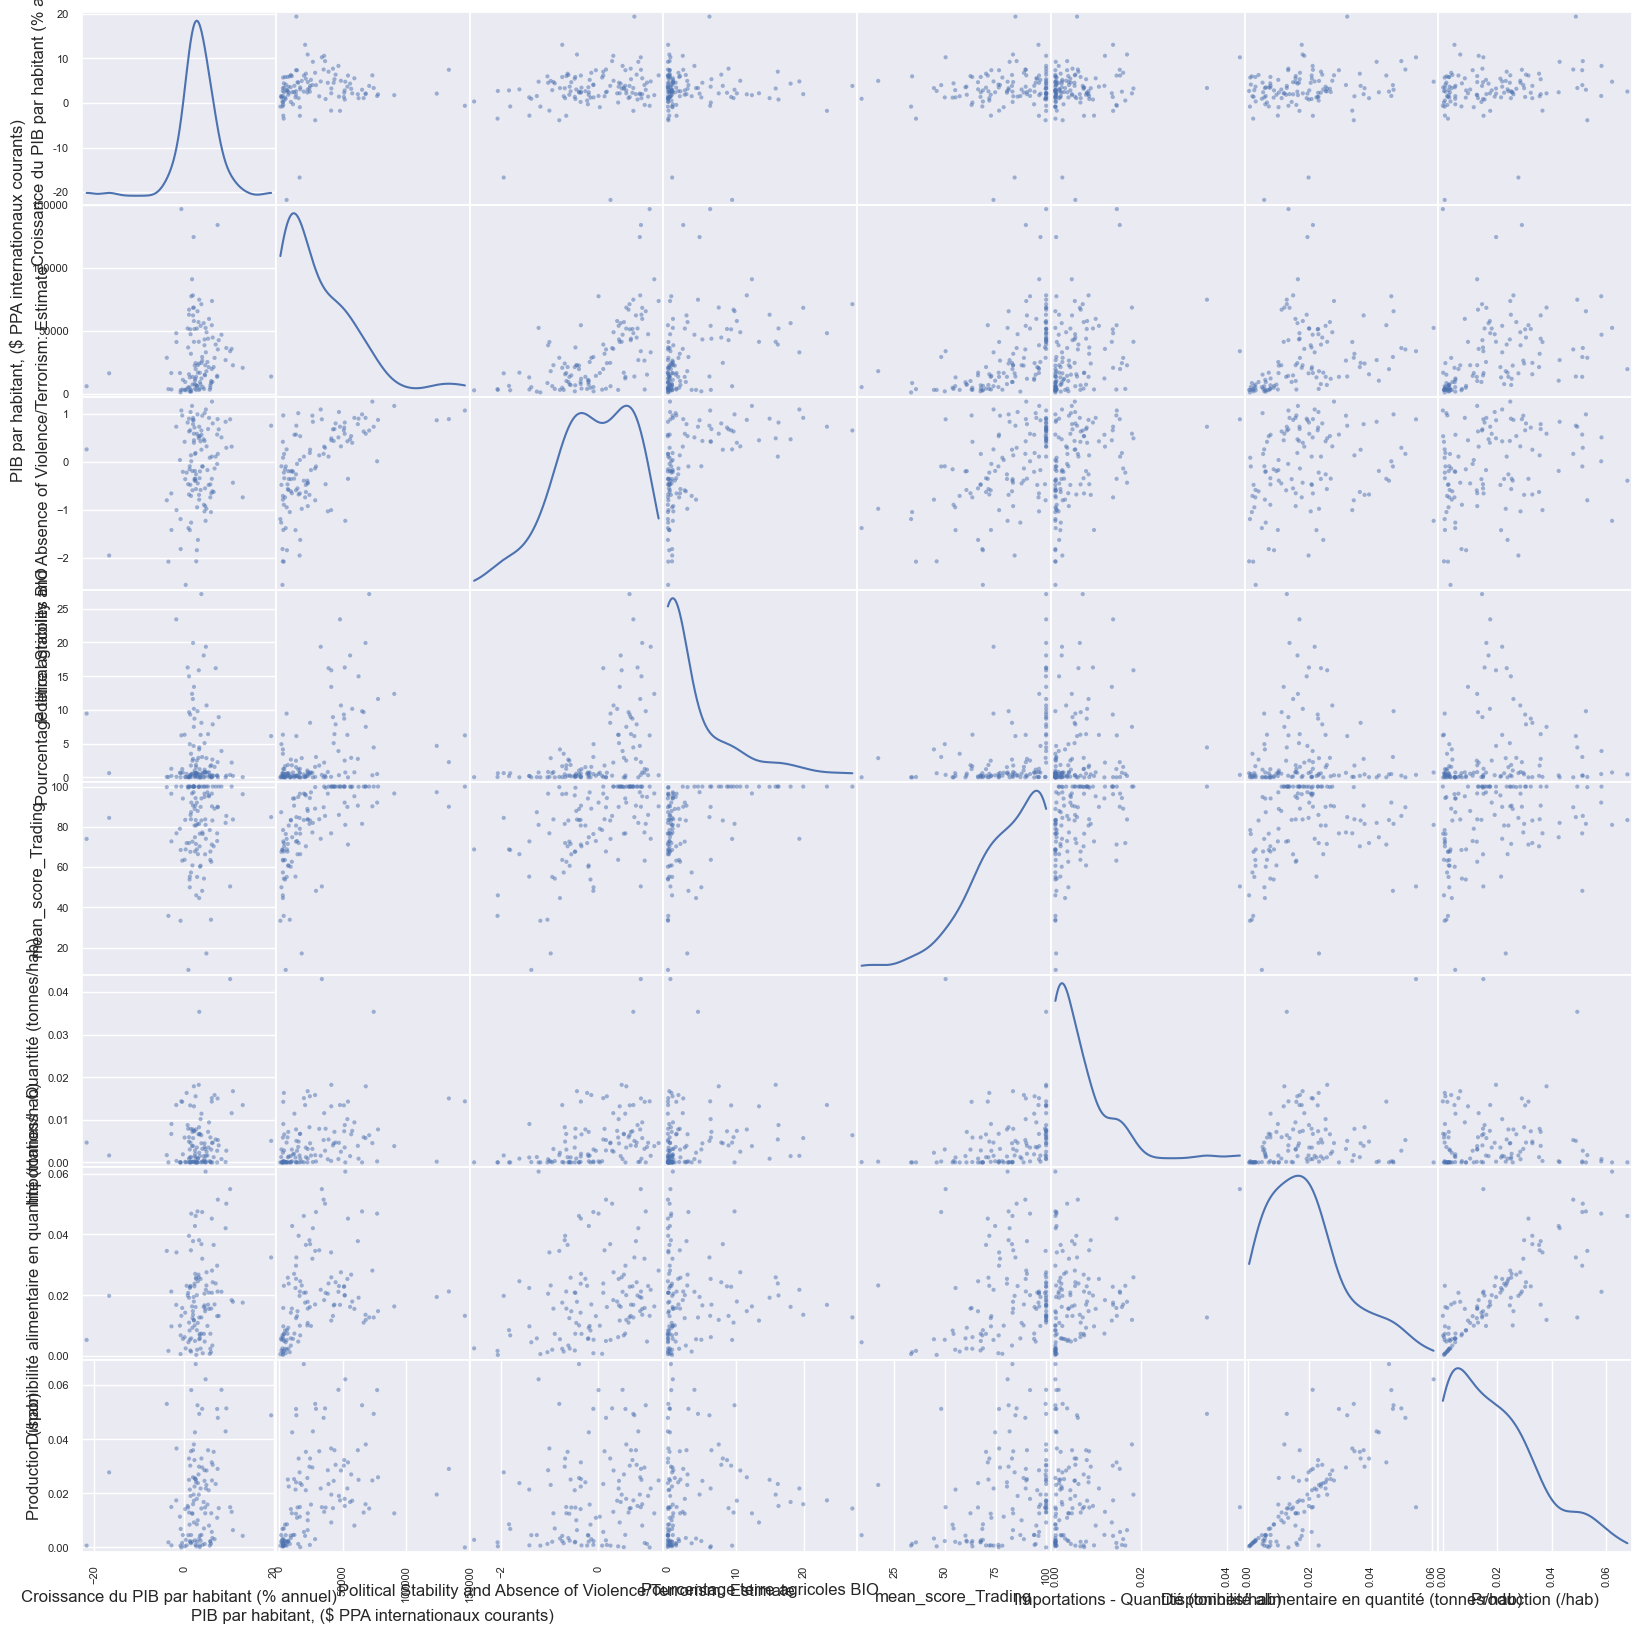

In [25]:
# Correlation deux a deux des variables:
pd.plotting.scatter_matrix(data_export_notebook.iloc[:,:],diagonal='kde',figsize=(20,20))

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyses</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">3.1 - Classification Hiérarchique Ascendante</h3>
</div>

In [26]:
#1ere méthode

Text(0.5, 1.0, 'Dendrogramme')

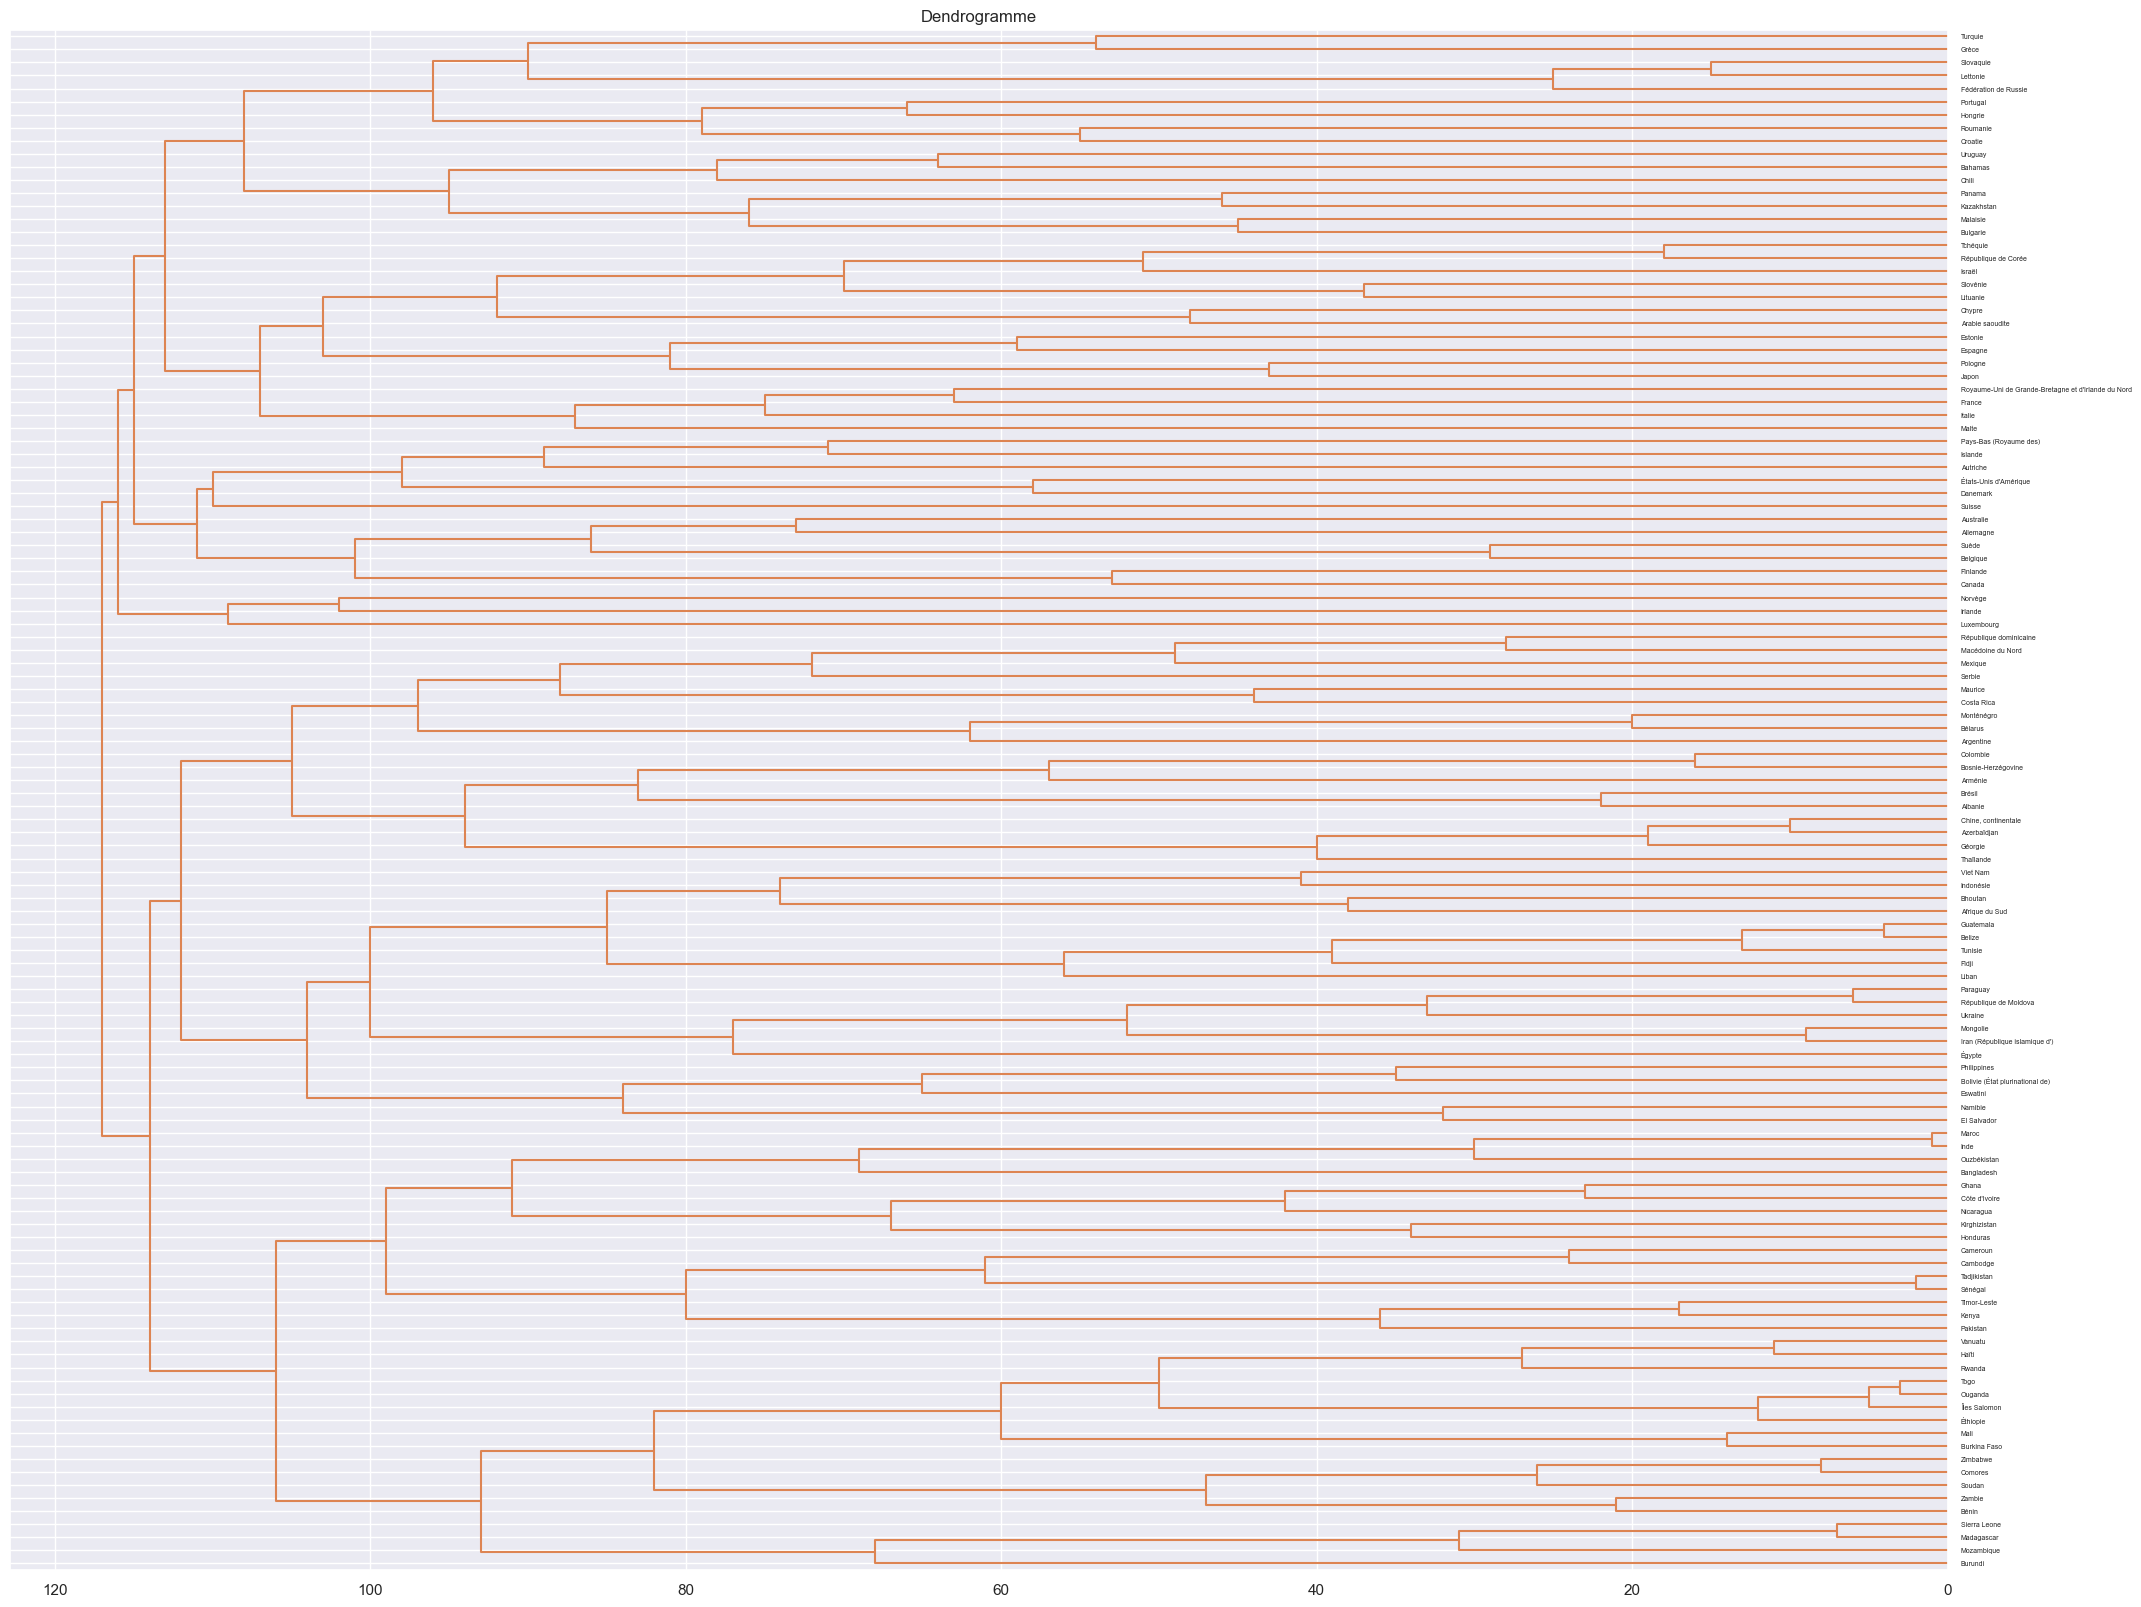

In [27]:
# Creation du dendrogramme:
ward = AgglomerativeClustering(linkage='ward',compute_full_tree=True).fit(data_export_notebook)

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])

# Dendrogramme avec clusters en couleurs:
plt.figure(figsize=(25, 20))
dendrogram(dendro,color_threshold=160,labels=list(data_export_notebook.index),
           show_leaf_counts=True,orientation="left")
plt.title("Dendrogramme")

In [28]:
#2eme méthode

In [29]:
Z = linkage(Complet_scaled_df, method="ward")
Z[:10]

array([[ 22.        ,  90.        ,   0.43980648,   2.        ],
       [ 33.        ,  59.        ,   0.55972965,   2.        ],
       [ 35.        ,  77.        ,   0.6240477 ,   2.        ],
       [ 21.        ,  92.        ,   0.62552395,   2.        ],
       [ 66.        ,  82.        ,   0.67213218,   2.        ],
       [ 51.        ,  85.        ,   0.69662561,   2.        ],
       [113.        , 119.        ,   0.69710122,   3.        ],
       [ 80.        , 112.        ,   0.70845583,   2.        ],
       [  1.        ,  74.        ,   0.74316743,   2.        ],
       [ 69.        ,  83.        ,   0.75061498,   2.        ]])

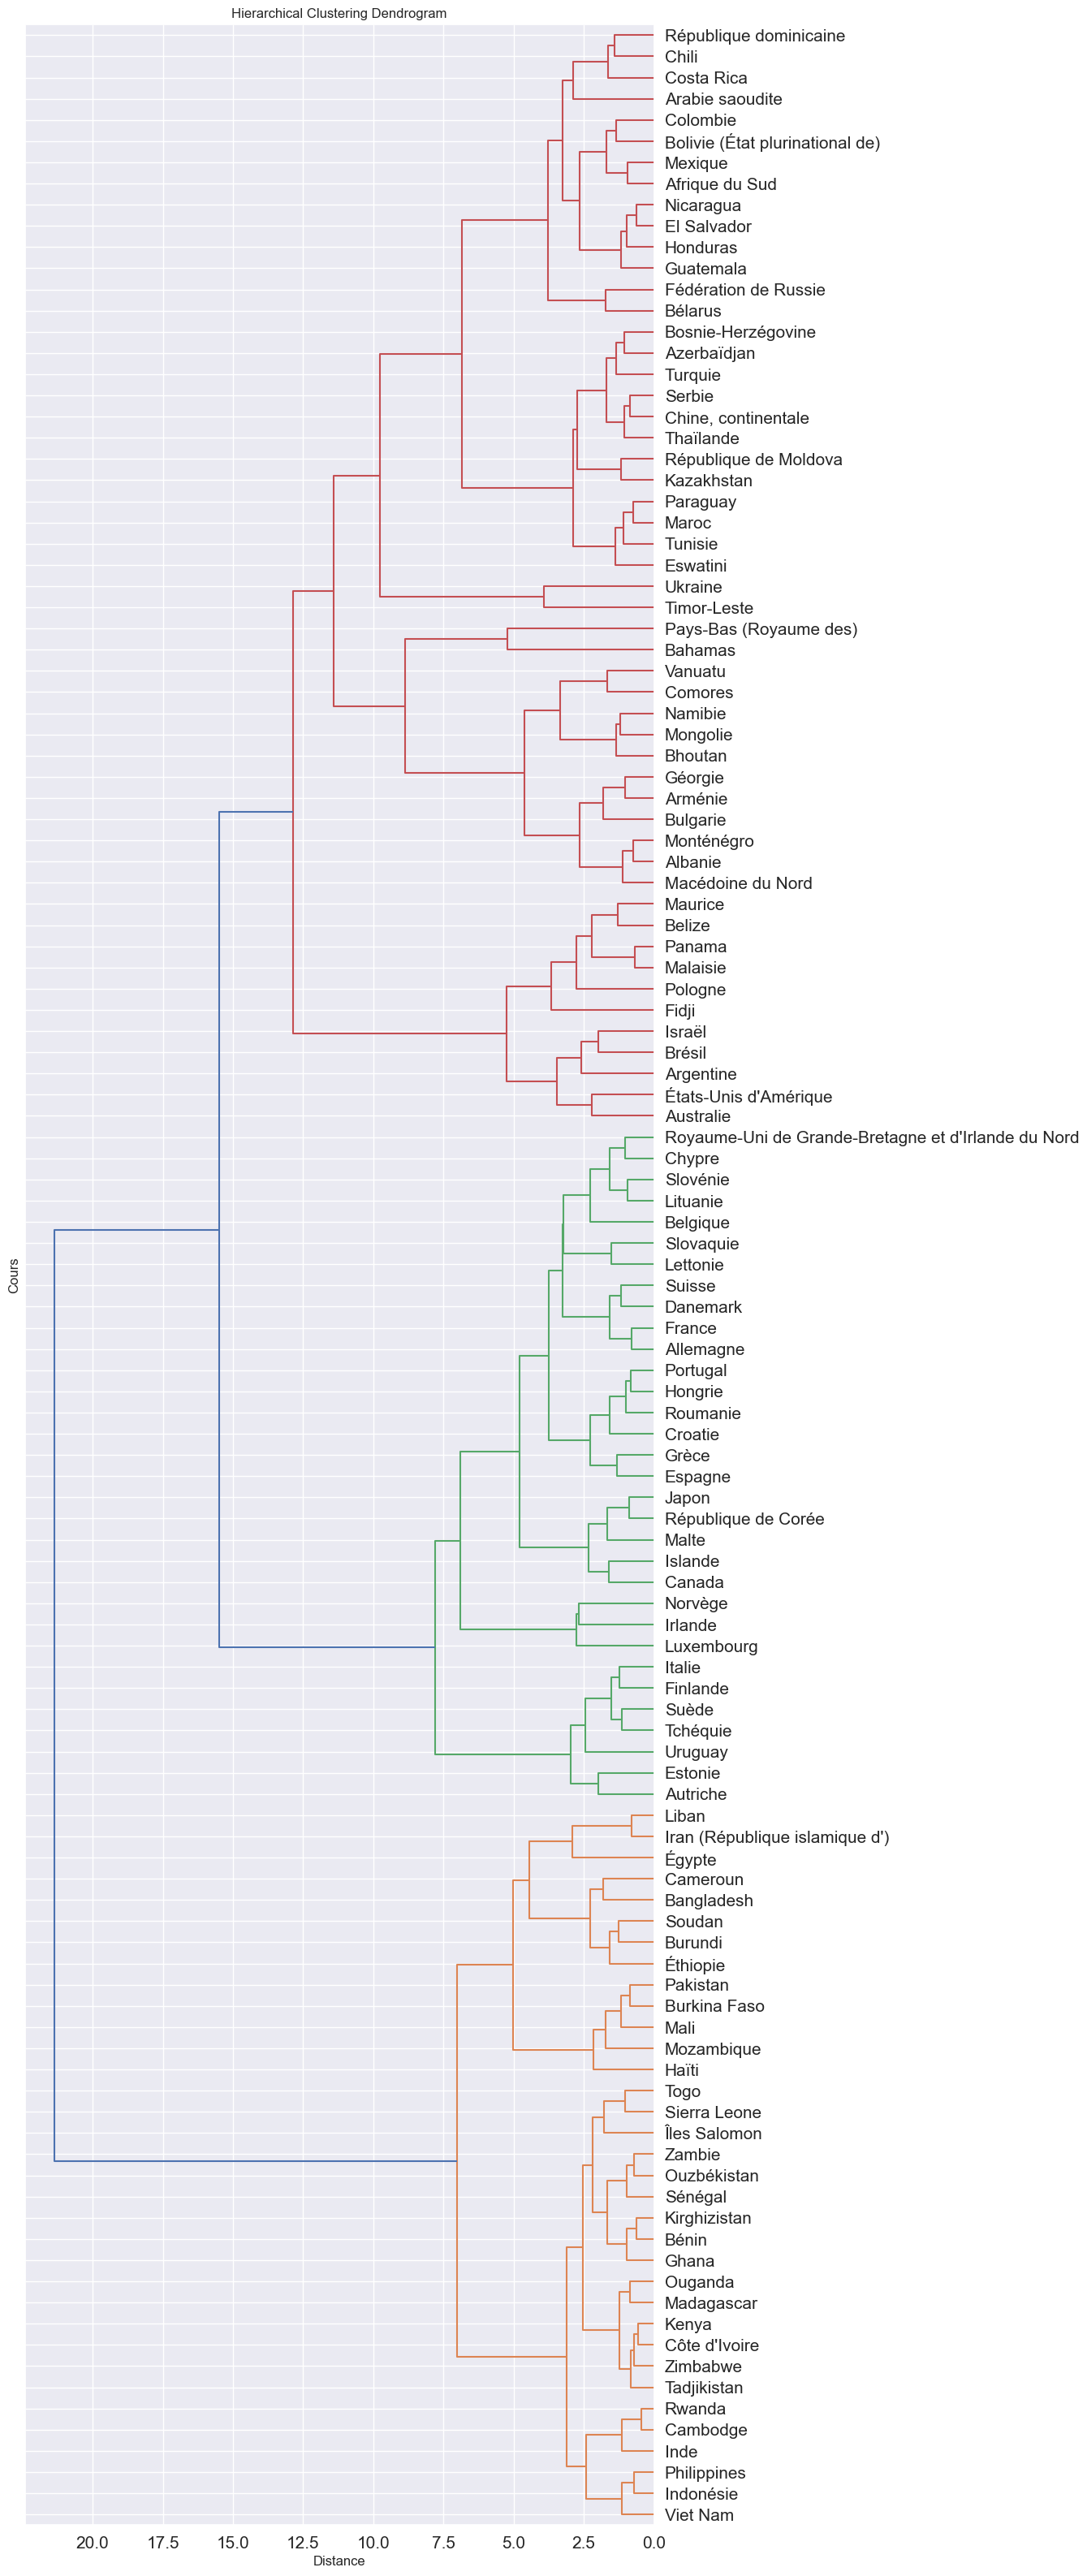

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Cours")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

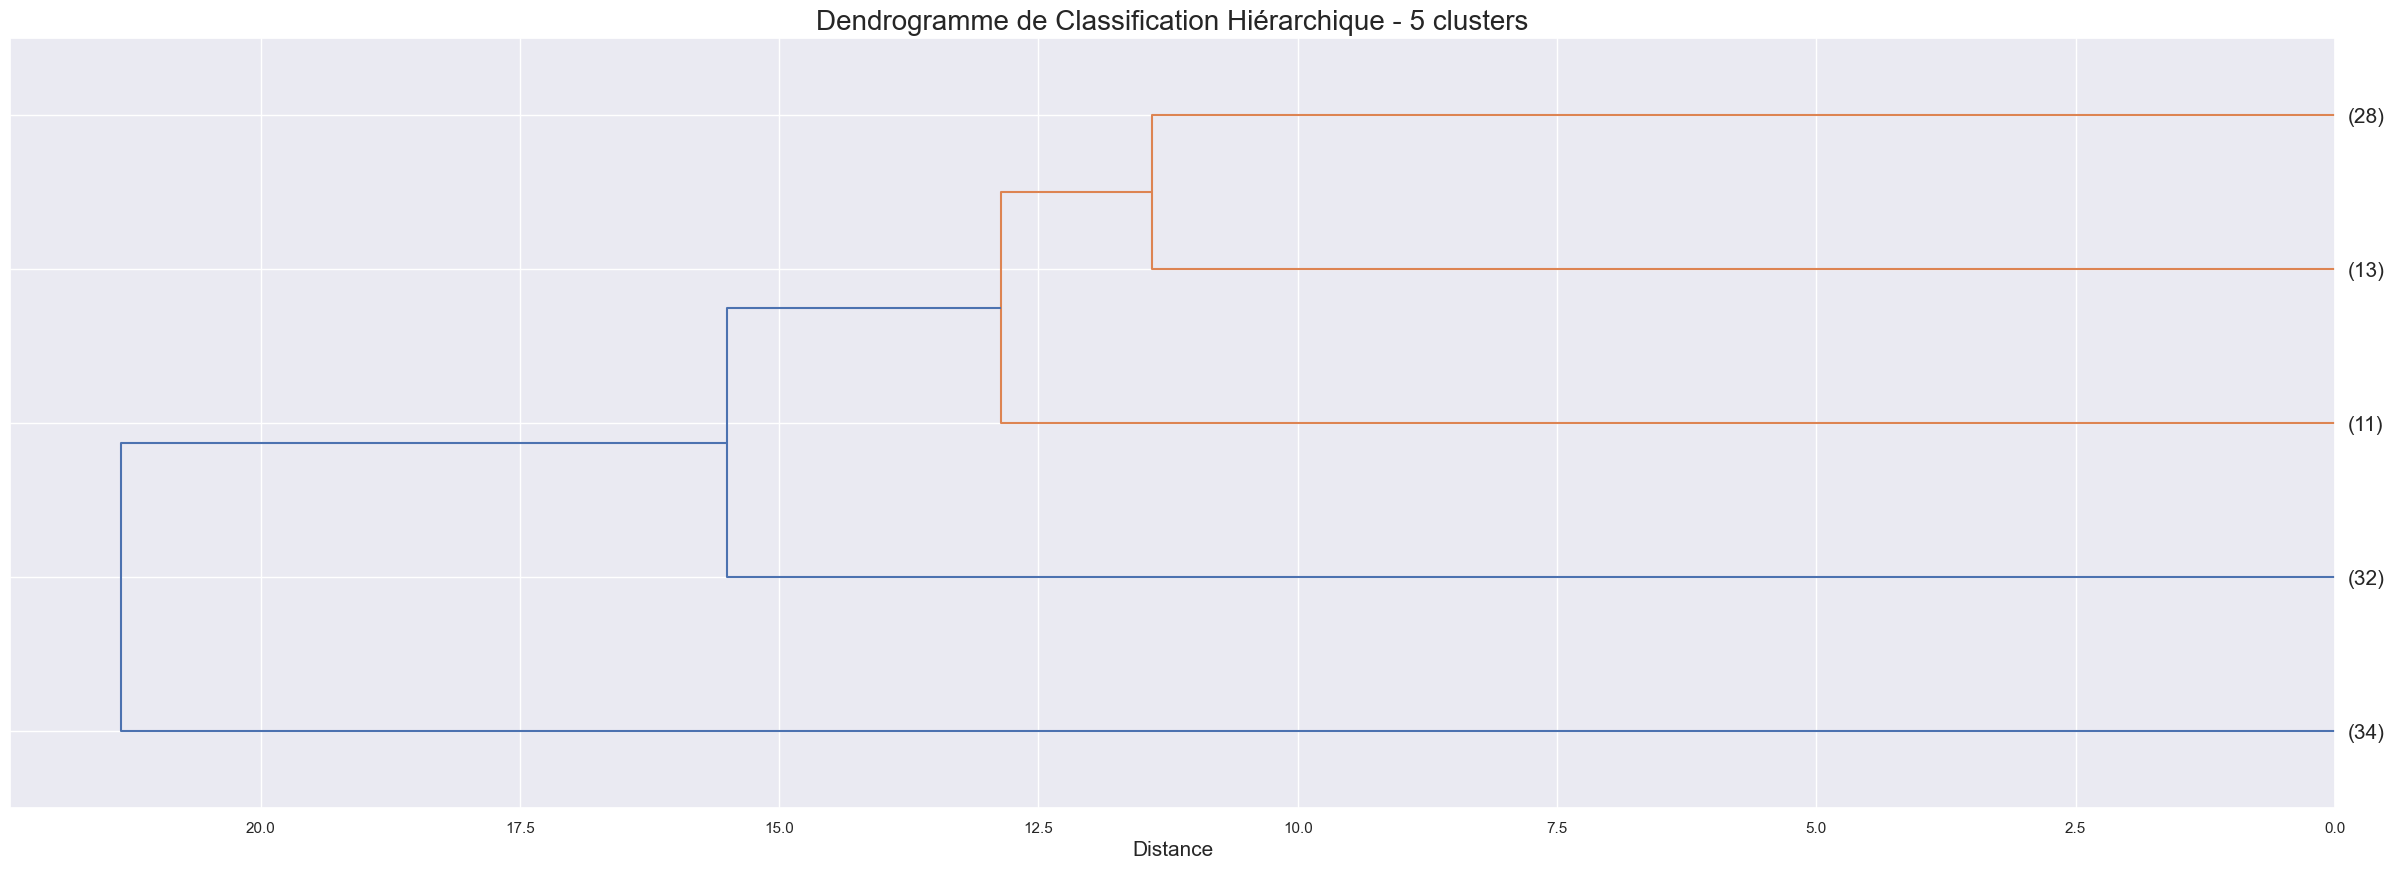

In [31]:
#Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme de Classification Hiérarchique - 5 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = names, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')

plt.show()

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">3.2 - Clusters CHA</h3>
</div>

In [32]:
#Isoler les groupes CAH
data_export_notebook["cluster_cah"] = fcluster(Z,t=5,criterion='maxclust')
cluster_cah = fcluster(Z,t=5,criterion='maxclust')
data_export_notebook["cluster_cah"] = data_export_notebook["cluster_cah"].apply(str)

data_export_notebook.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Afrique du Sud to Îles Salomon
Data columns (total 9 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Croissance du PIB par habitant (% annuel)                        118 non-null    float64
 1   PIB par habitant, ($ PPA internationaux courants)                118 non-null    float64
 2   Political Stability and Absence of Violence/Terrorism: Estimate  118 non-null    float64
 3   Pourcentage terre agricoles BIO                                  118 non-null    float64
 4   mean_score_Trading                                               118 non-null    float64
 5   Importations - Quantité (tonnes/hab)                             118 non-null    float64
 6   Disponibilité alimentaire en quantité (tonnes/hab)               118 non-null    float64
 7   Production (/hab)           

In [33]:
data_export_notebook

Croissance du PIB par habitant (% annuel)  \
Pays                                                               
Afrique du Sud                                          1.056875   
Albanie                                                 6.139017   
Allemagne                                               1.074952   
Arabie saoudite                                         6.132627   
Argentine                                               3.989131   
...                                                          ...   
Zimbabwe                                                4.387997   
Égypte                                                  4.928456   
États-Unis d'Amérique                                   1.561598   
Éthiopie                                                2.677562   
Îles Salomon                                            0.080631   

                       PIB par habitant, ($ PPA internationaux courants)  \
Pays                                                                       
Afrique du Sud                                              15330.769274   
Albanie                                                     19492.783099   
Allemagne                                                   66616.022245   
Arabie saoudite                                             54251.637904   
Argentine                                                   29037.489122   
...                                                                  ...   
Zimbabwe                                                     3660.835501   
Égypte                                                      17769.223740   
États-Unis d'Amérique                                       77246.673883   
Éthiopie                                                     2888.736492   
Îles Salomon                                                 2907.642816   

                       Political Stability and Absence of Violence/Terrorism: Estimate  \
Pays                                                                                     
Afrique du Sud                                                 -0.681386                 
Albanie                                                         0.106261                 
Allemagne                                                       0.628492                 
Arabie saoudite                                                -0.355806                 
Argentine                                                      -0.098594                 
...                                                                  ...                 
Zimbabwe                                                       -0.894974                 
Égypte                                                         -0.978701                 
États-Unis d'Amérique                                           0.008701                 
Éthiopie                                                       -2.070606                 
Îles Salomon                                                    0.413906                 

                       Pourcentage terre agricoles BIO  mean_score_Trading  \
Pays                                                                         
Afrique du Sud                                0.046469           71.942345   
Albanie                                       0.061641           96.493770   
Allemagne                                     9.674601          100.000000   
Arabie saoudite                               0.013427           71.183318   
Argentine                                     3.029070           48.168133   
...                                                ...                 ...   
Zimbabwe                                      0.009492           54.262635   
Égypte                                        2.858551           17.049507   
États-Unis d'Amérique                         0.499679           92.058020   
Éthiopie                                      0.619254           45.929030   
Îles Salomon                              

In [34]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
data_export_notebook.groupby('cluster_cah').mean()

Croissance du PIB par habitant (% annuel)  \
cluster_cah                                              
1                                             2.700160   
2                                             3.196582   
3                                             6.984613   
4                                             5.794676   
5                                             0.658923   

             PIB par habitant, ($ PPA internationaux courants)  \
cluster_cah                                                      
1                                                  6146.545949   
2                                                 62663.712892   
3                                                 37682.484433   
4                                                 23767.857535   
5                                                 21133.011916   

             Political Stability and Absence of Violence/Terrorism: Estimate  \
cluster_cah                                                                    
1                                                    -0.841698                 
2                                                     0.712498                 
3                                                     0.215440                 
4                                                     0.286541                 
5                                                    -0.427488                 

             Pourcentage terre agricoles BIO  mean_score_Trading  \
cluster_cah                                                        
1                                   1.013898           58.801474   
2                                  10.065094           96.912678   
3                                   2.285563           82.245592   
4                                   0.962760           85.434937   
5                                   1.261644           83.815960   

             Importations - Quantité (tonnes/hab)  \
cluster_cah                                         
1                                        0.001597   
2                                        0.007304   
3                                        0.001312   
4                                        0.016853   
5                                        0.003283   

             Disponibilité alimentaire en quantité (tonnes/hab)  \
cluster_cah                                                       
1                                                     0.007042    
2                                                     0.019658    
3                                                     0.043231    
4                                                     0.017961    
5                                                     0.024084    

             Production (/hab)  
cluster_cah                     
1                     0.005521  
2                     0.021411  
3                     0.053841  
4                     0.008163  
5                     0.023963

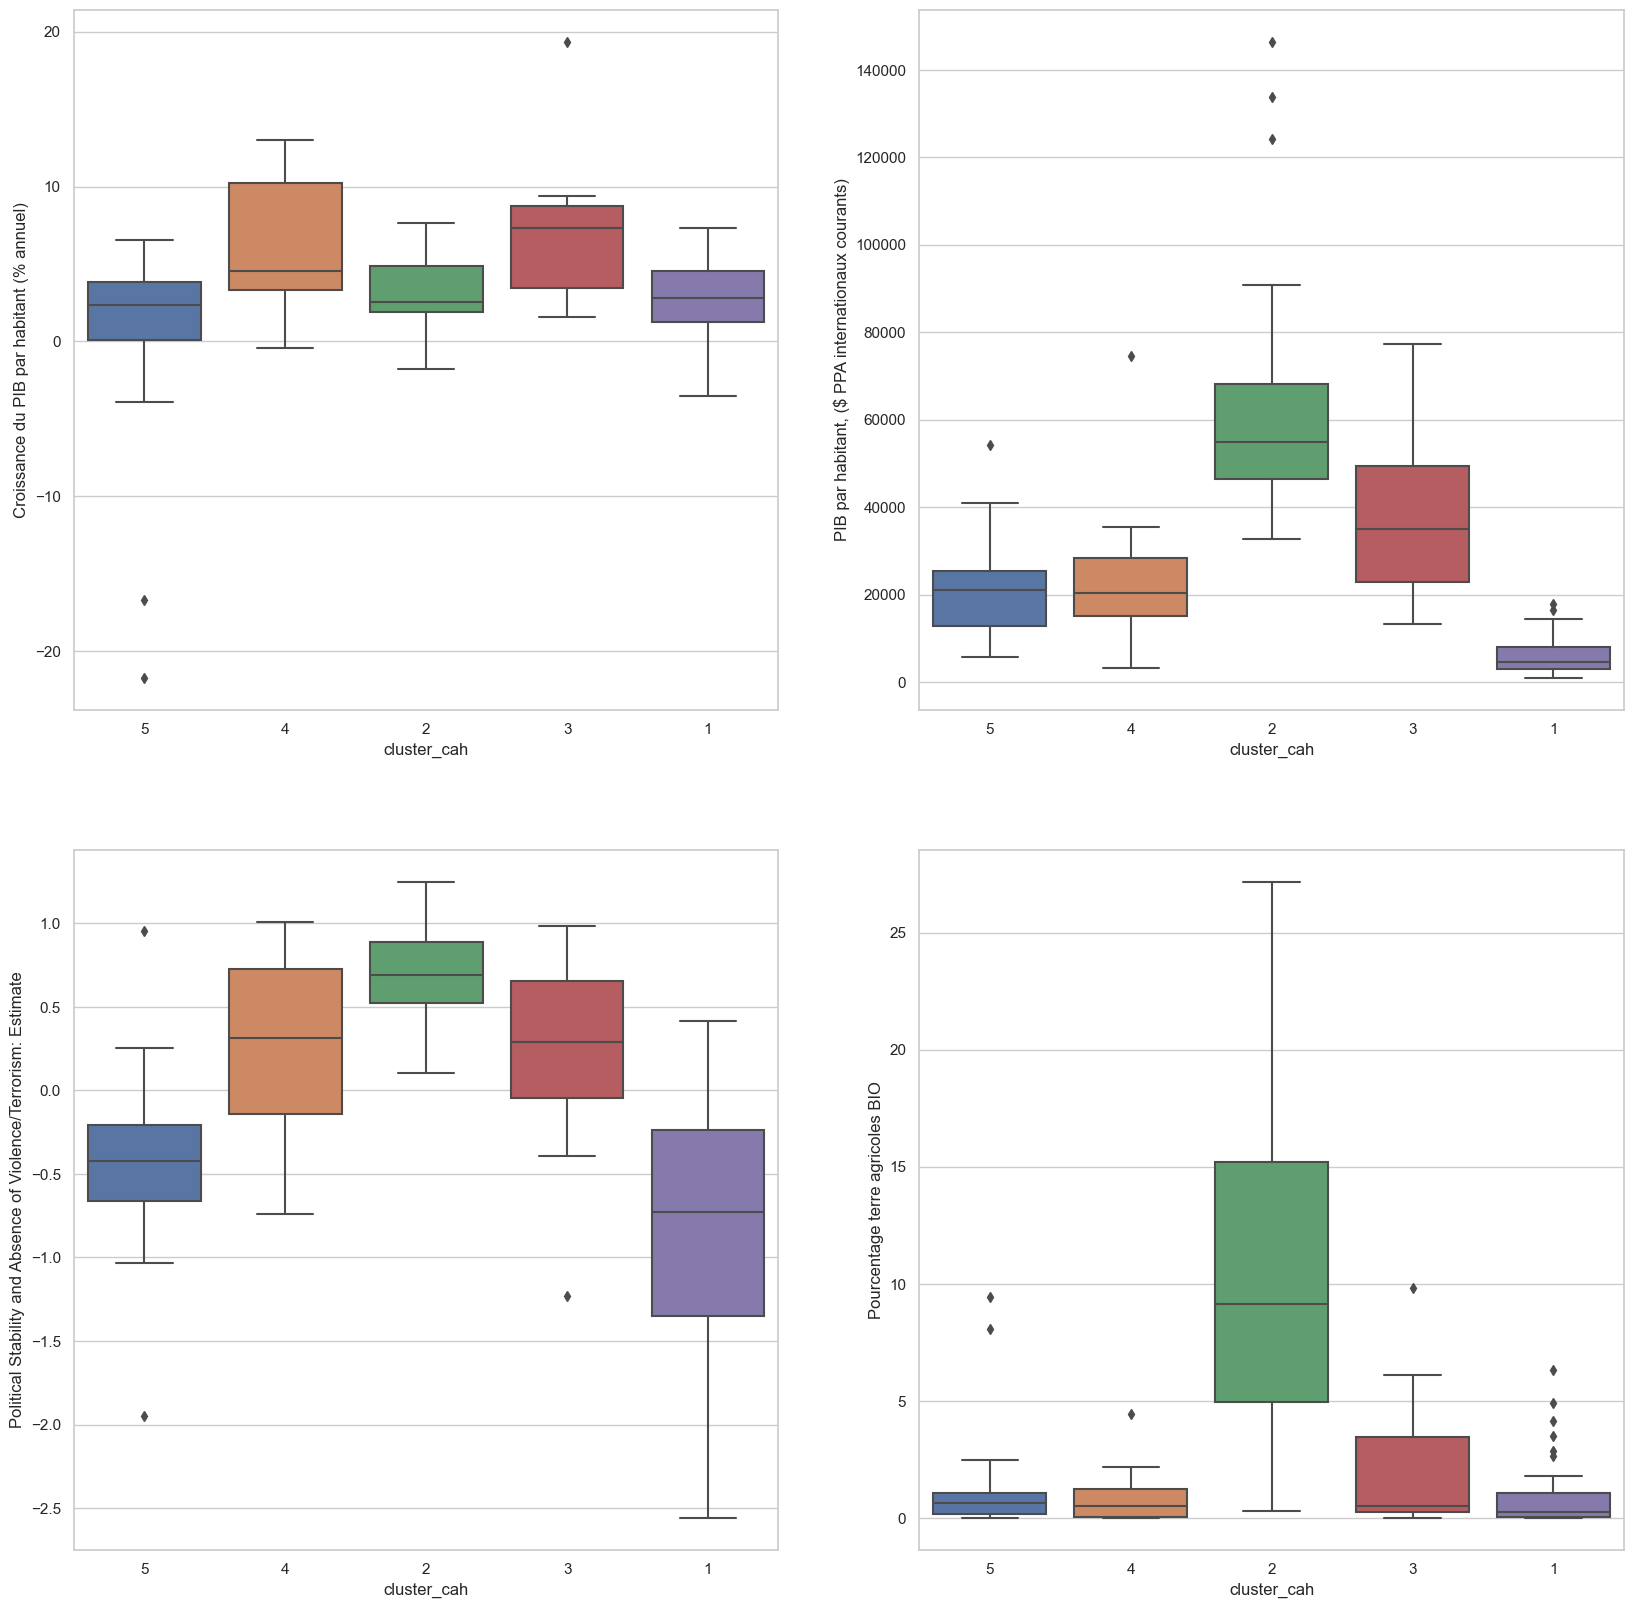

In [35]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Croissance du PIB par habitant (% annuel)')

plt.subplot(222)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='PIB par habitant, ($ PPA internationaux courants)')

plt.subplot(223)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Political Stability and Absence of Violence/Terrorism: Estimate')

plt.subplot(224)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Pourcentage terre agricoles BIO')

plt.show(block=False)

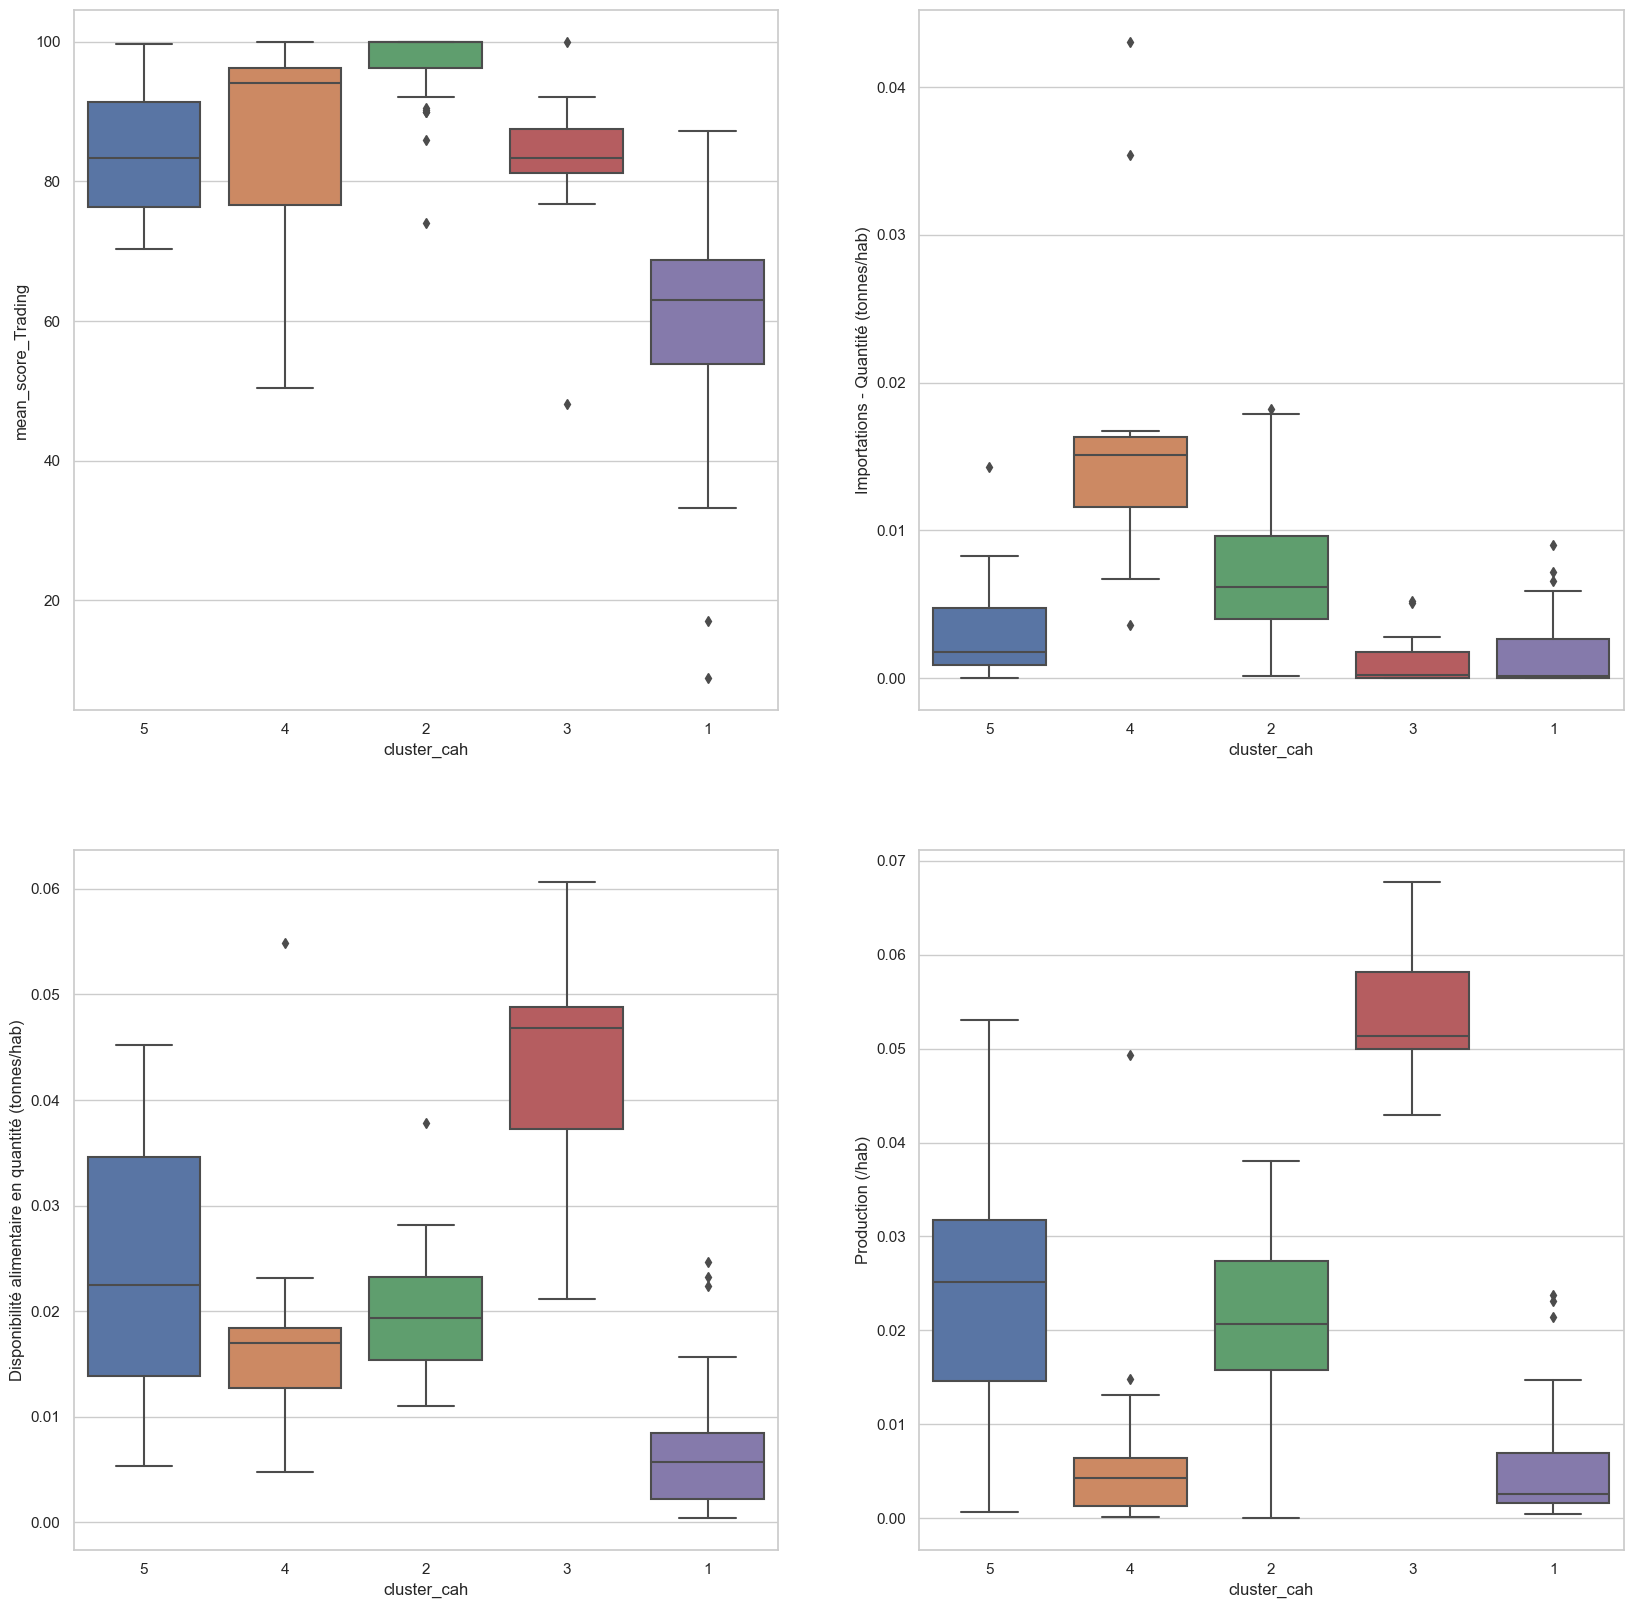

In [36]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='mean_score_Trading')

plt.subplot(222)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Importations - Quantité (tonnes/hab)')

plt.subplot(223)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Disponibilité alimentaire en quantité (tonnes/hab)')

plt.subplot(224)
sns.boxplot(data=data_export_notebook, x='cluster_cah', y='Production (/hab)')

plt.show(block=False)

In [37]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = data_export_notebook[data_export_notebook['cluster_cah'] == "1"]
df_groupe2_cah = data_export_notebook[data_export_notebook['cluster_cah'] == "2"]
df_groupe3_cah = data_export_notebook[data_export_notebook['cluster_cah'] == "3"]
df_groupe4_cah = data_export_notebook[data_export_notebook['cluster_cah'] == "4"]
df_groupe5_cah = data_export_notebook[data_export_notebook['cluster_cah'] == "5"]

In [38]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
data_export_notebook.groupby('cluster_cah').mean(numeric_only = True)

Croissance du PIB par habitant (% annuel)  \
cluster_cah                                              
1                                             2.700160   
2                                             3.196582   
3                                             6.984613   
4                                             5.794676   
5                                             0.658923   

             PIB par habitant, ($ PPA internationaux courants)  \
cluster_cah                                                      
1                                                  6146.545949   
2                                                 62663.712892   
3                                                 37682.484433   
4                                                 23767.857535   
5                                                 21133.011916   

             Political Stability and Absence of Violence/Terrorism: Estimate  \
cluster_cah                                                                    
1                                                    -0.841698                 
2                                                     0.712498                 
3                                                     0.215440                 
4                                                     0.286541                 
5                                                    -0.427488                 

             Pourcentage terre agricoles BIO  mean_score_Trading  \
cluster_cah                                                        
1                                   1.013898           58.801474   
2                                  10.065094           96.912678   
3                                   2.285563           82.245592   
4                                   0.962760           85.434937   
5                                   1.261644           83.815960   

             Importations - Quantité (tonnes/hab)  \
cluster_cah                                         
1                                        0.001597   
2                                        0.007304   
3                                        0.001312   
4                                        0.016853   
5                                        0.003283   

             Disponibilité alimentaire en quantité (tonnes/hab)  \
cluster_cah                                                       
1                                                     0.007042    
2                                                     0.019658    
3                                                     0.043231    
4                                                     0.017961    
5                                                     0.024084    

             Production (/hab)  
cluster_cah                     
1                     0.005521  
2                     0.021411  
3                     0.053841  
4                     0.008163  
5                     0.023963

In [39]:
data_export_notebook.groupby('cluster_cah').count()

Croissance du PIB par habitant (% annuel)  \
cluster_cah                                              
1                                                   34   
2                                                   32   
3                                                   11   
4                                                   13   
5                                                   28   

             PIB par habitant, ($ PPA internationaux courants)  \
cluster_cah                                                      
1                                                           34   
2                                                           32   
3                                                           11   
4                                                           13   
5                                                           28   

             Political Stability and Absence of Violence/Terrorism: Estimate  \
cluster_cah                                                                    
1                                                           34                 
2                                                           32                 
3                                                           11                 
4                                                           13                 
5                                                           28                 

             Pourcentage terre agricoles BIO  mean_score_Trading  \
cluster_cah                                                        
1                                         34                  34   
2                                         32                  32   
3                                         11                  11   
4                                         13                  13   
5                                         28                  28   

             Importations - Quantité (tonnes/hab)  \
cluster_cah                                         
1                                              34   
2                                              32   
3                                              11   
4                                              13   
5                                              28   

             Disponibilité alimentaire en quantité (tonnes/hab)  \
cluster_cah                                                       
1                                                           34    
2                                                           32    
3                                                           11    
4                                                           13    
5                                                           28    

             Production (/hab)  
cluster_cah                     
1                           34  
2                           32  
3                           11  
4                           13  
5                           28

A partir des moyennes calculés ci-dessus, 
le groupe 2 se différencie par un fort PIB par habitant et à l'inverse le groupe 1 a un faible PIB par habitant.
Le groupe 2 présente également un potentiel marché intéressant toujours sur l'idée d'un régime alimentaire potentiellement compatible avec les besoins en poulet et aussi pour de l'alimentation BIO.
Enfin le groupe 4 est très intéressant concernant la demande en poulet mais a un niveau de vie plus faible et l'alimentation BIO paraît moins importante.

Les pays du groupe 2 et 4 sont retenus sur le critère de Importations - Quantité (tonnes/hab), mais également sur le PIB par habitant, ($ PPA internationaux courants). Les moyennes calculées ci-dessus ainsi que les réprésentations graphiques permettent d'identifier ces deux groupes comme étant propices à une pénétration du marché.

In [40]:
df_groupe3_cah

Croissance du PIB par habitant (% annuel)  \
Pays                                                               
Argentine                                               3.989131   
Australie                                               2.950326   
Belize                                                  7.328153   
Brésil                                                  2.544333   
Fidji                                                  19.350915   
Israël                                                  4.752677   
Malaisie                                                7.483918   
Maurice                                                 9.208546   
Panama                                                  9.368783   
Pologne                                                 8.292366   
États-Unis d'Amérique                                   1.561598   

                       PIB par habitant, ($ PPA internationaux courants)  \
Pays                                                                       
Argentine                                                   29037.489122   
Australie                                                   65365.948511   
Belize                                                      13280.598394   
Brésil                                                      19398.589813   
Fidji                                                       13534.194309   
Israël                                                      52133.609325   
Malaisie                                                    35040.310093   
Maurice                                                     26579.756092   
Panama                                                      36169.586211   
Pologne                                                     46720.573014   
États-Unis d'Amérique                                       77246.673883   

                       Political Stability and Absence of Violence/Terrorism: Estimate  \
Pays                                                                                     
Argentine                                                      -0.098594                 
Australie                                                       0.983716                 
Belize                                                          0.564006                 
Brésil                                                         -0.395037                 
Fidji                                                           0.748509                 
Israël                                                         -1.228965                 
Malaisie                                                        0.163118                 
Maurice                                                         0.830024                 
Panama                                                          0.289221                 
Pologne                                                         0.505146                 
États-Unis d'Amérique                                           0.008701                 

                       Pourcentage terre agricoles BIO  mean_score_Trading  \
Pays                                                                         
Argentine                                     3.029070           48.168133   
Australie                                     9.817313           81.480580   
Belize                                        0.279121           76.738855   
Brésil                                        0.447032           83.363630   
Fidji                                         6.126123           84.833308   
Israël                                        0.736020           80.968040   
Malaisie                                      0.015622           89.718545   
Maurice                                       0.014535           81.950392   
Panama                                        0.264428           85.422008   
Pologne                                       3.912246          100.000000   
États-Unis d'Amérique                     

En conclusion à ce premier partitionnement ressort que 45 pays sont susceptibles de devenir une cible pertinente pour l'entreprise. La demande sera bien présente dans ces pays notamment en termes de besoin en poulet et en termes de produit BIO.

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">3.3 - K-means</h3>
</div>

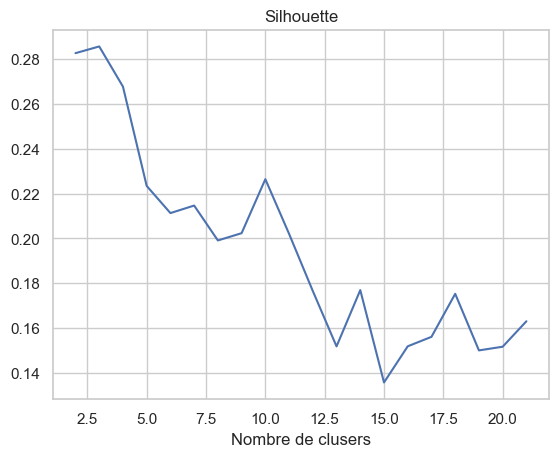

In [41]:
#Determination du nombre optimum de clusters pour le K-means: methode silhouette:

#Creation de la methode:
res = np.arange(20,dtype="double")                                   #On fait varrier le nombre de clusters de 2 à 20
for k in np.arange(20):
    km = KMeans(n_clusters=k+2, n_init = 'auto')
    km.fit(Complet_scaled_df)
    res[k] = metrics.silhouette_score(Complet_scaled_df,km.labels_)

#Graphique:
plt.title("Silhouette")
plt.xlabel("Nombre de clusers")
plt.plot(np.arange(2,22,1),res)

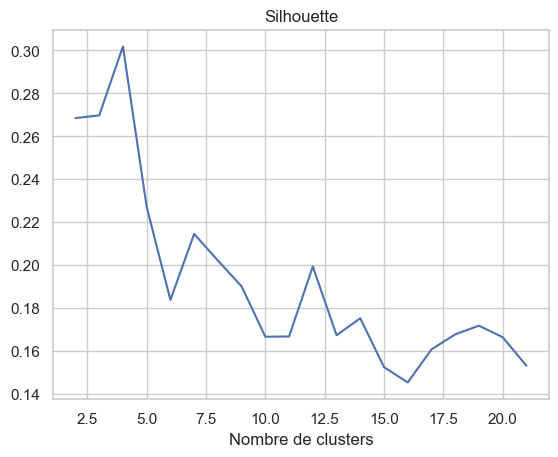

In [42]:
# Définition explicite de n_init pour éviter le warning

n_clusters_range = np.arange(2, 22)  # Nombre de clusters de 2 à 21
res = np.zeros(len(n_clusters_range), dtype="double")

for i, k in enumerate(n_clusters_range):
    km = KMeans(n_clusters=k, n_init='auto')  # Définition explicite de n_init=10
    km.fit(Complet_scaled_df)
    res[i] = metrics.silhouette_score(Complet_scaled_df, km.labels_)

# Graphique
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(n_clusters_range, res)
plt.show()

Text(0, 0.5, 'WCSS')

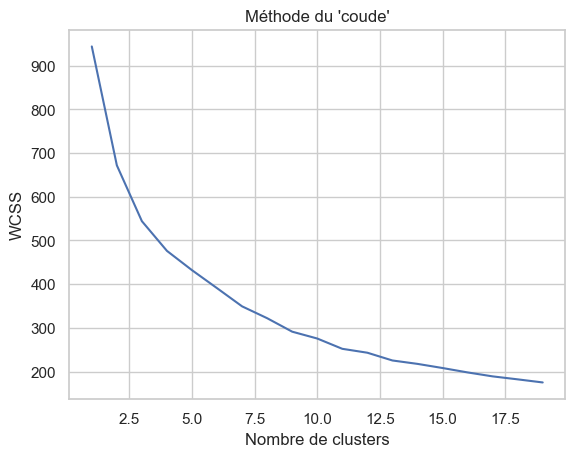

In [43]:
#Determination du nombre optimum de clusters pour le K-means: methode du coude:

#Creation de la methode:
#WCSS: somme des carrés intra-cluster
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Complet_scaled_df)
    wcss.append(kmeans.inertia_)

#Graphique:
plt.plot(range(1, 20), wcss)
plt.title("Méthode du 'coude'")
plt.xlabel("Nombre de clusters")
plt.ylabel('WCSS')

Pour optimiser et limiter la perte d’information, il serait préférable de choisir idéalement k = 3 ou k = 4.

Cependant, le coefficient de silhouette suggère également des options intéressantes dans notre contexte métier pour k = 5 et. Effectuer un clustering avec k = 3, k = 4 puis avec k = 5, permettra d’évaluer et de comparer les partitions obtenues avec celles issues de la classification hiérarchique. Il est pertinent de confronter les deux approches en utilisant un même nombre de clusters.

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\AppData\Local\Temp\ipykernel_25936\2145019819.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

C:\Users\kevin\AppData\Local\Temp\ipykernel_25936\2145019819.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Le nombre de classes optimal est 19


C:\Users\kevin\AppData\Local\Temp\ipykernel_25936\2145019819.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)


Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap')

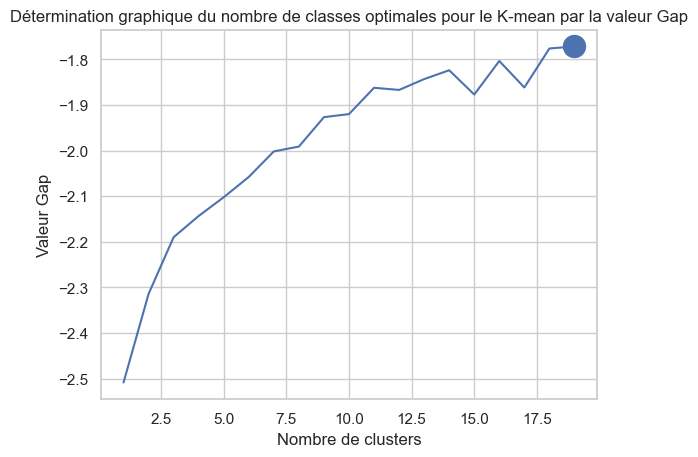

In [44]:
#Determination du nombre optimum de clusters pour le K-means: methode de gap statistic:

#Création de la méthode:
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal


#Calcul
k, gapdf = optimalK(Complet_scaled_df, nrefs=5, maxClusters=20)
print("Le nombre de classes optimal est", k)

#Graphique:
plt.plot(gapdf.clusterCount, gapdf.gap)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250)
plt.xlabel("Nombre de clusters")
plt.ylabel("Valeur Gap")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap")

In [45]:
#Clustering K-Means en 3 clusters
cls3 = KMeans(n_clusters=3, n_init = 'auto')
cls3.fit(Complet_scaled_df)

KMeans(n_clusters=3, n_init='auto')

In [46]:
#Clustering K-Means en 5 clusters
cls5 = KMeans(n_clusters=5, n_init = 'auto')
cls5.fit(Complet_scaled_df)

KMeans(n_clusters=5, n_init='auto')

In [47]:
#Clustering K-Means en 4 clusters
cls4 = KMeans(n_clusters=4, n_init = 'auto')
cls4.fit(Complet_scaled_df)

KMeans(n_clusters=4, n_init='auto')

In [48]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_ 
clusters_kmeans5 = cls5.labels_
clusters_kmeans4 = cls4.labels_

In [49]:
# Ajout d'une colonne contenant le cluster attribue:

data_export_notebook["cluster_km3"] = clusters_kmeans3
data_export_notebook["cluster_km3"] = data_export_notebook["cluster_km3"].apply(str)

In [50]:
# Ajout d'une colonne contenant le cluster attribue:

data_export_notebook["cluster_km5"] = clusters_kmeans5
data_export_notebook["cluster_km5"] = data_export_notebook["cluster_km5"].apply(str)

In [51]:
# Ajout d'une colonne contenant le cluster attribue:

data_export_notebook["cluster_km4"] = clusters_kmeans4
data_export_notebook["cluster_km4"] = data_export_notebook["cluster_km4"].apply(str)

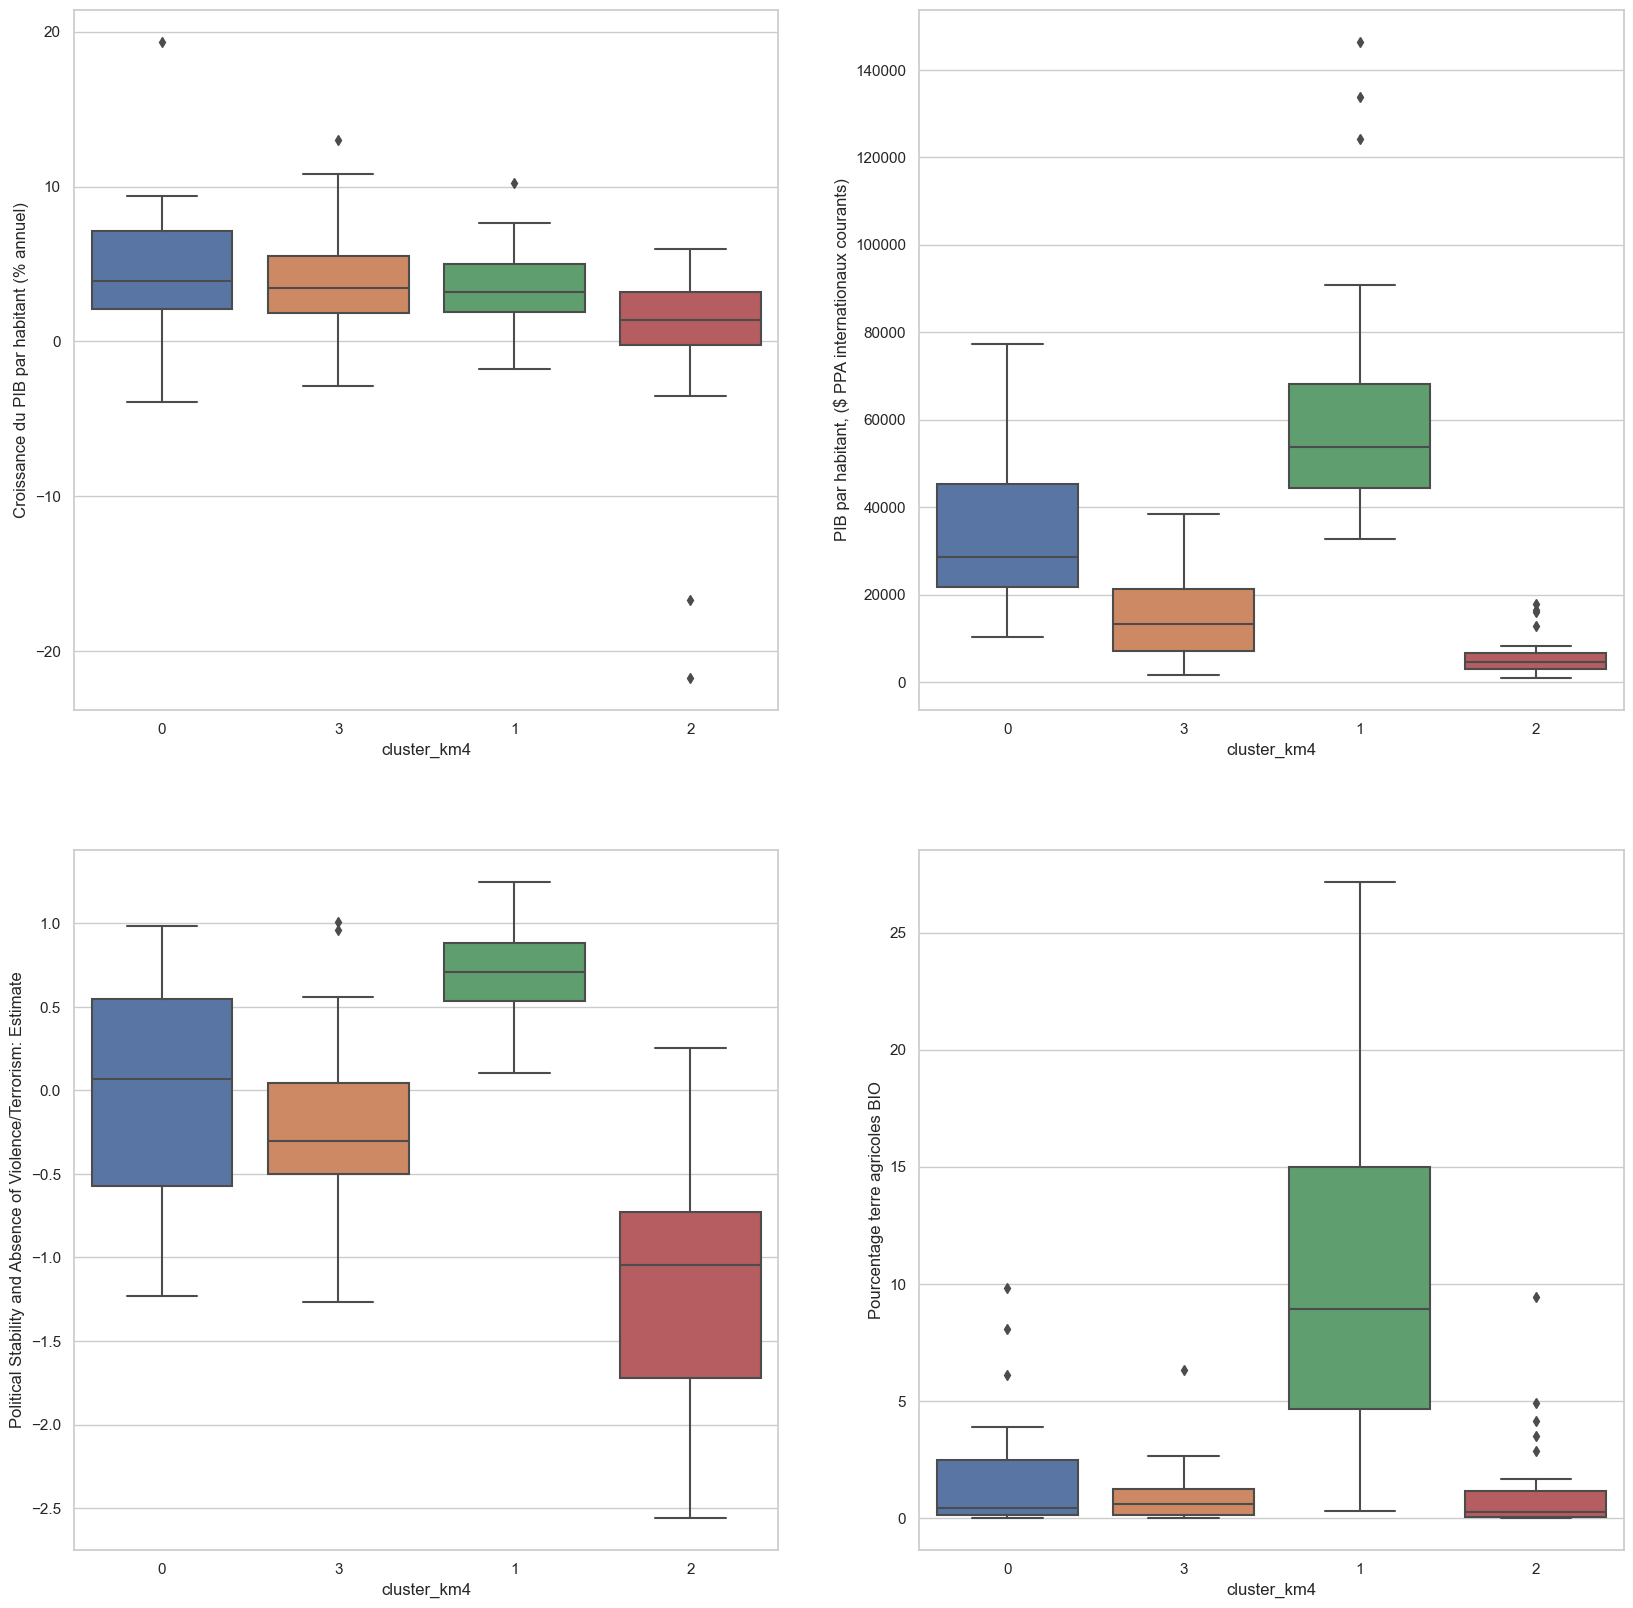

In [52]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Croissance du PIB par habitant (% annuel)')

plt.subplot(222)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='PIB par habitant, ($ PPA internationaux courants)')

plt.subplot(223)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Political Stability and Absence of Violence/Terrorism: Estimate')

plt.subplot(224)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Pourcentage terre agricoles BIO')


plt.show(block=False)

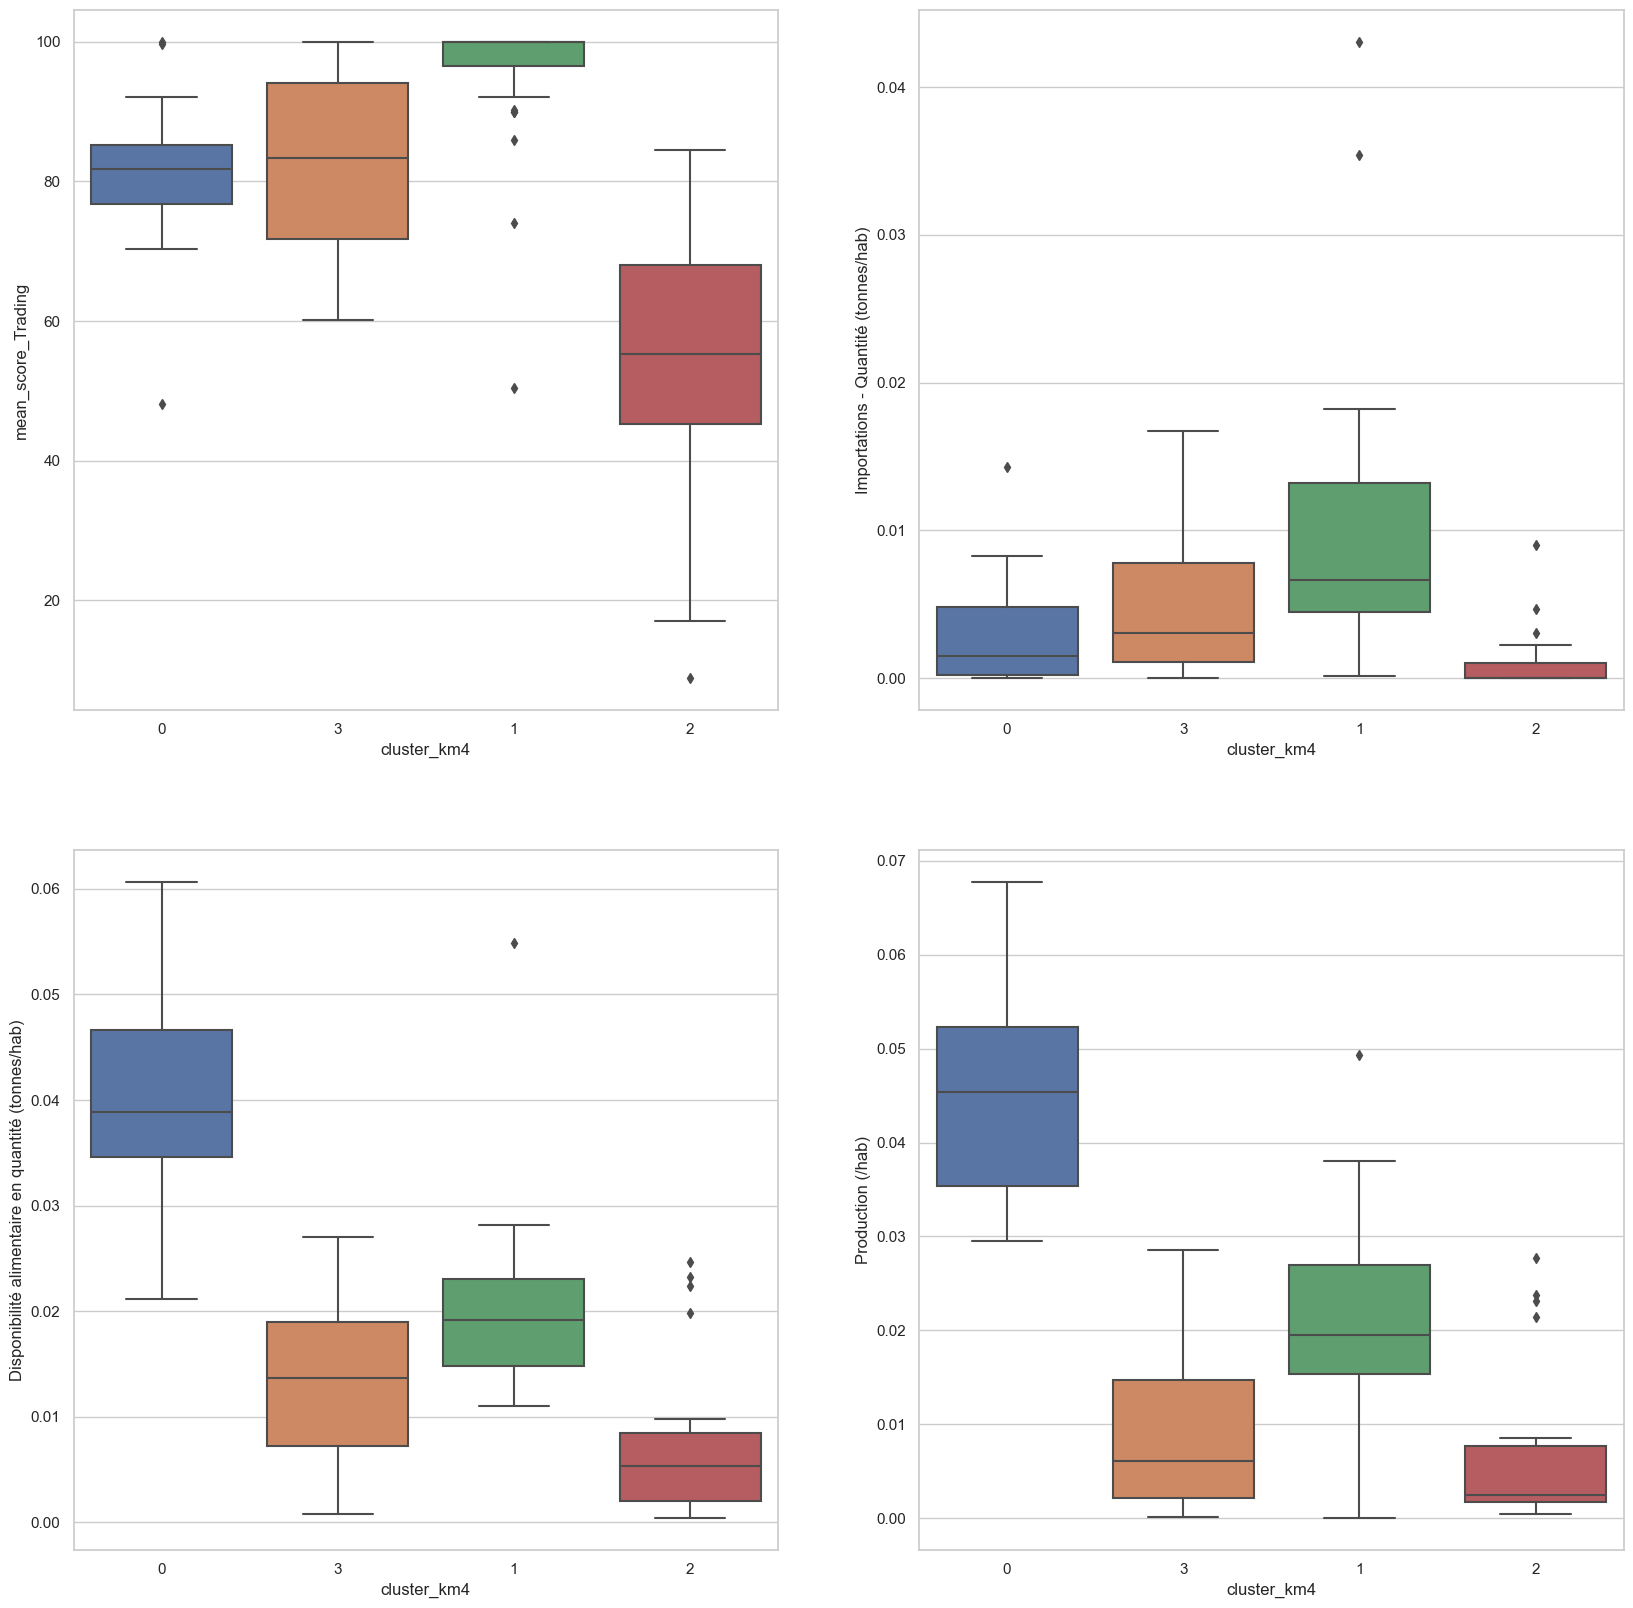

In [53]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='mean_score_Trading')

plt.subplot(222)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Importations - Quantité (tonnes/hab)')

plt.subplot(223)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Disponibilité alimentaire en quantité (tonnes/hab)')

plt.subplot(224)
sns.boxplot(data=data_export_notebook, x='cluster_km4', y='Production (/hab)')


plt.show(block=False)

In [54]:
#Comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
data_export_notebook.groupby('cluster_km4').mean(numeric_only = True)

Croissance du PIB par habitant (% annuel)  \
cluster_km4                                              
0                                             4.631636   
1                                             3.451350   
2                                             0.030997   
3                                             3.705099   

             PIB par habitant, ($ PPA internationaux courants)  \
cluster_km4                                                      
0                                                 34217.268487   
1                                                 62162.925895   
2                                                  6083.039300   
3                                                 14634.220500   

             Political Stability and Absence of Violence/Terrorism: Estimate  \
cluster_km4                                                                    
0                                                     0.006003                 
1                                                     0.715979                 
2                                                    -1.153203                 
3                                                    -0.223207                 

             Pourcentage terre agricoles BIO  mean_score_Trading  \
cluster_km4                                                        
0                                   1.801648           81.162242   
1                                   9.822840           95.788892   
2                                   1.325547           53.923252   
3                                   0.881527           81.895521   

             Importations - Quantité (tonnes/hab)  \
cluster_km4                                         
0                                        0.002949   
1                                        0.009342   
2                                        0.001020   
3                                        0.005421   

             Disponibilité alimentaire en quantité (tonnes/hab)  \
cluster_km4                                                       
0                                                     0.040361    
1                                                     0.019966    
2                                                     0.007344    
3                                                     0.013404    

             Production (/hab)  
cluster_km4                     
0                     0.044898  
1                     0.021619  
2                     0.006772  
3                     0.009631

In [55]:
data_export_notebook.groupby('cluster_km4').count()

Croissance du PIB par habitant (% annuel)  \
cluster_km4                                              
0                                                   22   
1                                                   33   
2                                                   23   
3                                                   40   

             PIB par habitant, ($ PPA internationaux courants)  \
cluster_km4                                                      
0                                                           22   
1                                                           33   
2                                                           23   
3                                                           40   

             Political Stability and Absence of Violence/Terrorism: Estimate  \
cluster_km4                                                                    
0                                                           22                 
1                                                           33                 
2                                                           23                 
3                                                           40                 

             Pourcentage terre agricoles BIO  mean_score_Trading  \
cluster_km4                                                        
0                                         22                  22   
1                                         33                  33   
2                                         23                  23   
3                                         40                  40   

             Importations - Quantité (tonnes/hab)  \
cluster_km4                                         
0                                              22   
1                                              33   
2                                              23   
3                                              40   

             Disponibilité alimentaire en quantité (tonnes/hab)  \
cluster_km4                                                       
0                                                           22    
1                                                           33    
2                                                           23    
3                                                           40    

             Production (/hab)  cluster_cah  cluster_km3  cluster_km5  
cluster_km4                                                            
0                           22           22           22           22  
1                           33           33           33           33  
2                           23           23           23           23  
3                           40           40           40           40

Les groupes formés par la méthode du kmean en 4 groupes sont choisis car un groupes se distingue des autres concernant les besoins de l'entreprise.

Les pays du groupe 1 sont retenus sur le critère de Importations - Quantité (tonnes/hab), mais également sur le Pourcentage terre agricoles BIO. Les moyennes calculées ci-dessus ainsi que les réprésentations graphiques permettent d'identifier ces deux groupes comme étant propices à une pénétration du marché.

In [56]:
data_export_notebook[data_export_notebook["cluster_km4"] == "1"]

Croissance du PIB par habitant (% annuel)  \
Pays                                                                                            
Allemagne                                                                            1.074952   
Autriche                                                                             3.808956   
Bahamas                                                                             10.220516   
Belgique                                                                             2.136544   
Chypre                                                                               3.636903   
République de Corée                                                                  2.805238   
Croatie                                                                              7.675112   
Danemark                                                                             1.925341   
Espagne                                                                              4.968051   
Estonie                                                                             -1.782541   
Finlande                                                                             1.060265   
France                                                                               2.142732   
Grèce                                                                                6.997745   
Hongrie                                                                              5.308352   
Irlande                                                                              7.426582   
Islande                                                                              6.178393   
Italie                                                                               4.325954   
Japon                                                                                1.403822   
Lettonie                                                                             3.234499   
Lituanie                                                                             1.325924   
Luxembourg                                                                          -0.643838   
Malte                                                                                5.516261   
Norvège                                                                              2.084382   
Pays-Bas (Royaume des)                                                               3.339098   
Portugal                                                                             6.336224   
Roumanie                                                                             4.517235   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                   3.168175   
Slovaquie                                                                            2.160638   
Tchéquie                                                                             0.755661   
Slovénie                                                                             2.271239   
Suisse                                                                               1.736001   
Suède                                                                                1.966864   
Uruguay                                                                              4.813287   

                                                    PIB par habitant, ($ PPA internationaux courants)  \
Pays                                                                                                    
Allemagne                                                                                66616.022245   
Autriche                                                                                 70975.720635   
Bahamas                                                                                  33637.504798   
Belgique                                                                                 68274.200642   
Chypre                    

In [109]:
data_export_notebook[data_export_notebook["cluster_km4"] == "1"].index

Index(['Allemagne', 'Autriche', 'Bahamas', 'Belgique', 'Chypre',
       'République de Corée', 'Croatie', 'Danemark', 'Espagne', 'Estonie',
       'Finlande', 'France', 'Grèce', 'Hongrie', 'Irlande', 'Islande',
       'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malte',
       'Norvège', 'Pays-Bas (Royaume des)', 'Portugal', 'Roumanie',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Slovaquie',
       'Tchéquie', 'Slovénie', 'Suisse', 'Suède', 'Uruguay'],
      dtype='object', name='Pays')

En conclusion à ce deuxième partitionnement ressort que 33 pays sont susceptibles de devenir une cible pertinente pour l'entreprise. La demande sera bien présente dans ces pays notamment en termes de besoin en poulet et en termes de produit BIO.Le cluster est plus petit que pour la méthode avec CHA et on voit que les autres groupes sont eux aussi intéressants (0 et 3) mais pas pour l'ensemble des variables explicatives. Pour plus de précision, on va faire une ACP pour visualiser les groupes et pouvoir conclure de manière plus précise.

In [85]:
#Comparer les méthodes CHA et Kmeans pour les groupes sélectionnés

# Conditions à vérifier
condition = (
    (data_export_notebook['cluster_km4'].isin(["1"])) & 
    (data_export_notebook['cluster_cah'].isin(["2", "4"]))
)

# Récupérer les index des lignes qui satisfont les conditions
indexes = data_export_notebook.index[condition].tolist()

nombre_lignes = len(indexes)
print("\nPays correspondant aux groupes choisis dans les deux méthodes :", indexes)
print("\nNombre de pays correspondant:", nombre_lignes)

# Conditions individuelles
condition1 = data_export_notebook['cluster_km4'].isin(["1"])  # Première condition
condition2 = data_export_notebook['cluster_cah'].isin(["2", "4"])  # Deuxième condition

# Récupérer les index des lignes qui vérifient soit condition1 soit condition2, mais pas les deux en même temps
condition_exclusive = condition1 ^ condition2  # XOR logique : vrai si une seule des deux conditions est vraie

# Récupérer les index correspondant à la condition exclusive
indexes_exclusifs = data_export_notebook.index[condition_exclusive].tolist()

# Nombre de lignes correspondant à la condition exclusive
nombre_lignes_exclusives = len(indexes_exclusifs)

print("\nPays appartenant à l'une des deux méthodes:", indexes_exclusifs)
print("\nNombre de pays correspondant:", nombre_lignes_exclusives)


Pays correspondant aux groupes choisis dans les deux méthodes : ['Allemagne', 'Autriche', 'Bahamas', 'Belgique', 'Chypre', 'République de Corée', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grèce', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malte', 'Norvège', 'Pays-Bas (Royaume des)', 'Portugal', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovaquie', 'Tchéquie', 'Slovénie', 'Suisse', 'Suède', 'Uruguay']

Nombre de pays correspondant: 33

Pays appartenant à l'une des deux méthodes: ['Albanie', 'Arménie', 'Bhoutan', 'Bulgarie', 'Canada', 'Comores', 'Géorgie', 'Macédoine du Nord', 'Mongolie', 'Monténégro', 'Namibie', 'Vanuatu']

Nombre de pays correspondant: 12


In [58]:
#Denombrement des pays par clusters:
#Pour les cluster issus de la CAH:
print(data_export_notebook.groupby(data_export_notebook["cluster_cah"]).size())

#Pour les clusters issus du K-means:
print(data_export_notebook.groupby(data_export_notebook["cluster_km5"]).size())

print(data_export_notebook.groupby(data_export_notebook["cluster_km3"]).size())

print(data_export_notebook.groupby(data_export_notebook["cluster_km4"]).size())

cluster_cah
1    34
2    32
3    11
4    13
5    28
dtype: int64
cluster_km5
0    31
1    47
2     2
3    12
4    26
dtype: int64
cluster_km3
0    60
1    25
2    33
dtype: int64
cluster_km4
0    22
1    33
2    23
3    40
dtype: int64


In [59]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(cluster_cah, clusters_kmeans4)

#2 et 4 : cluster_cah
#2 et 3 : clusters_kmeans4

col_0   0   1   2   3
row_0                
1       0   0  21  13
2       1  31   0   0
3      11   0   0   0
4       0   2   0  11
5      10   0   2  16

<div style="background-color: RGB(81,10,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - ACP</h2>
</div>

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">2.2 - Réalisation de l'ACP</h3>
</div>

In [60]:
#Choix du nombre de composantes:
n_components = 5

In [61]:
#On instancie l'ACP :
pca = PCA(n_components=n_components)

In [62]:
#On l'entraine sur les données scalées :
pca.fit(Complet_scaled_df)

PCA(n_components=5)

<div style="border: 1px solid RGB(81,10,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(81,10,182); ">3.3 - Analyse résulats ACP</h3>
</div>

In [63]:
#La variance captée par chaque nouvelle composant:
pca.explained_variance_ratio_

array([0.38563421, 0.20254103, 0.13424739, 0.09655294, 0.06761208])

In [64]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([38.56, 20.25, 13.42,  9.66,  6.76])

In [65]:
scree_cum = scree.cumsum().round()
scree_cum

array([39., 59., 72., 82., 89.])

In [66]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

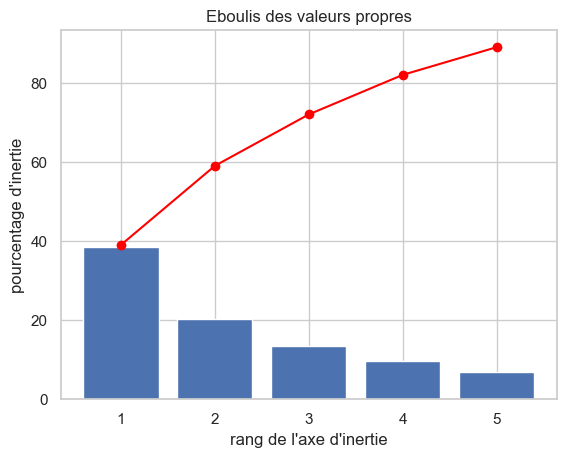

In [67]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [68]:
pcs = pca.components_
pcs

array([[-0.16006672, -0.46172535, -0.44995484, -0.3090231 , -0.42509273,
        -0.25415511, -0.3255631 , -0.33457995],
       [ 0.24104126, -0.13026278, -0.22352706, -0.41079066, -0.16636886,
        -0.2060598 ,  0.57192495,  0.55585971],
       [ 0.69451163, -0.13067412,  0.13601813, -0.29886478, -0.11933061,
         0.55121209, -0.06123616, -0.26633126],
       [-0.60788181,  0.03682532, -0.15749542, -0.26491639, -0.05315203,
         0.68998924,  0.23472529,  0.01148285],
       [ 0.02634489, -0.1202308 ,  0.07777877,  0.61844431, -0.72152687,
         0.15366971,  0.21901131,  0.0643913 ]])

In [69]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0 -0.160067 -0.461725 -0.449955 -0.309023 -0.425093 -0.254155 -0.325563   
1  0.241041 -0.130263 -0.223527 -0.410791 -0.166369 -0.206060  0.571925   
2  0.694512 -0.130674  0.136018 -0.298865 -0.119331  0.551212 -0.061236   
3 -0.607882  0.036825 -0.157495 -0.264916 -0.053152  0.689989  0.234725   
4  0.026345 -0.120231  0.077779  0.618444 -0.721527  0.153670  0.219011   

          7  
0 -0.334580  
1  0.555860  
2 -0.266331  
3  0.011483  
4  0.064391

In [70]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(3)

Croissance du PIB par habitant (% annuel)  \
F1                                     -0.160   
F2                                      0.241   
F3                                      0.695   
F4                                     -0.608   
F5                                      0.026   

    PIB par habitant, ($ PPA internationaux courants)  \
F1                                             -0.462   
F2                                             -0.130   
F3                                             -0.131   
F4                                              0.037   
F5                                             -0.120   

    Political Stability and Absence of Violence/Terrorism: Estimate  \
F1                                             -0.450                 
F2                                             -0.224                 
F3                                              0.136                 
F4                                             -0.157                 
F5                                              0.078                 

    Pourcentage terre agricoles BIO  mean_score_Trading  \
F1                           -0.309              -0.425   
F2                           -0.411              -0.166   
F3                           -0.299              -0.119   
F4                           -0.265              -0.053   
F5                            0.618              -0.722   

    Importations - Quantité (tonnes/hab)  \
F1                                -0.254   
F2                                -0.206   
F3                                 0.551   
F4                                 0.690   
F5                                 0.154   

    Disponibilité alimentaire en quantité (tonnes/hab)  Production (/hab)  
F1                                             -0.326              -0.335  
F2                                              0.572               0.556  
F3                                             -0.061              -0.266  
F4                                              0.235               0.011  
F5                                              0.219               0.064

In [71]:
pcs.T

F1        F2  \
Croissance du PIB par habitant (% annuel)          -0.160067  0.241041   
PIB par habitant, ($ PPA internationaux courants)  -0.461725 -0.130263   
Political Stability and Absence of Violence/Ter... -0.449955 -0.223527   
Pourcentage terre agricoles BIO                    -0.309023 -0.410791   
mean_score_Trading                                 -0.425093 -0.166369   
Importations - Quantité (tonnes/hab)               -0.254155 -0.206060   
Disponibilité alimentaire en quantité (tonnes/hab) -0.325563  0.571925   
Production (/hab)                                  -0.334580  0.555860   

                                                          F3        F4  \
Croissance du PIB par habitant (% annuel)           0.694512 -0.607882   
PIB par habitant, ($ PPA internationaux courants)  -0.130674  0.036825   
Political Stability and Absence of Violence/Ter...  0.136018 -0.157495   
Pourcentage terre agricoles BIO                    -0.298865 -0.264916   
mean_score_Trading                                 -0.119331 -0.053152   
Importations - Quantité (tonnes/hab)                0.551212  0.689989   
Disponibilité alimentaire en quantité (tonnes/hab) -0.061236  0.234725   
Production (/hab)                                  -0.266331  0.011483   

                                                          F5  
Croissance du PIB par habitant (% annuel)           0.026345  
PIB par habitant, ($ PPA internationaux courants)  -0.120231  
Political Stability and Absence of Violence/Ter...  0.077779  
Pourcentage terre agricoles BIO                     0.618444  
mean_score_Trading                                 -0.721527  
Importations - Quantité (tonnes/hab)                0.153670  
Disponibilité alimentaire en quantité (tonnes/hab)  0.219011  
Production (/hab)                                   0.064391

<Axes: >

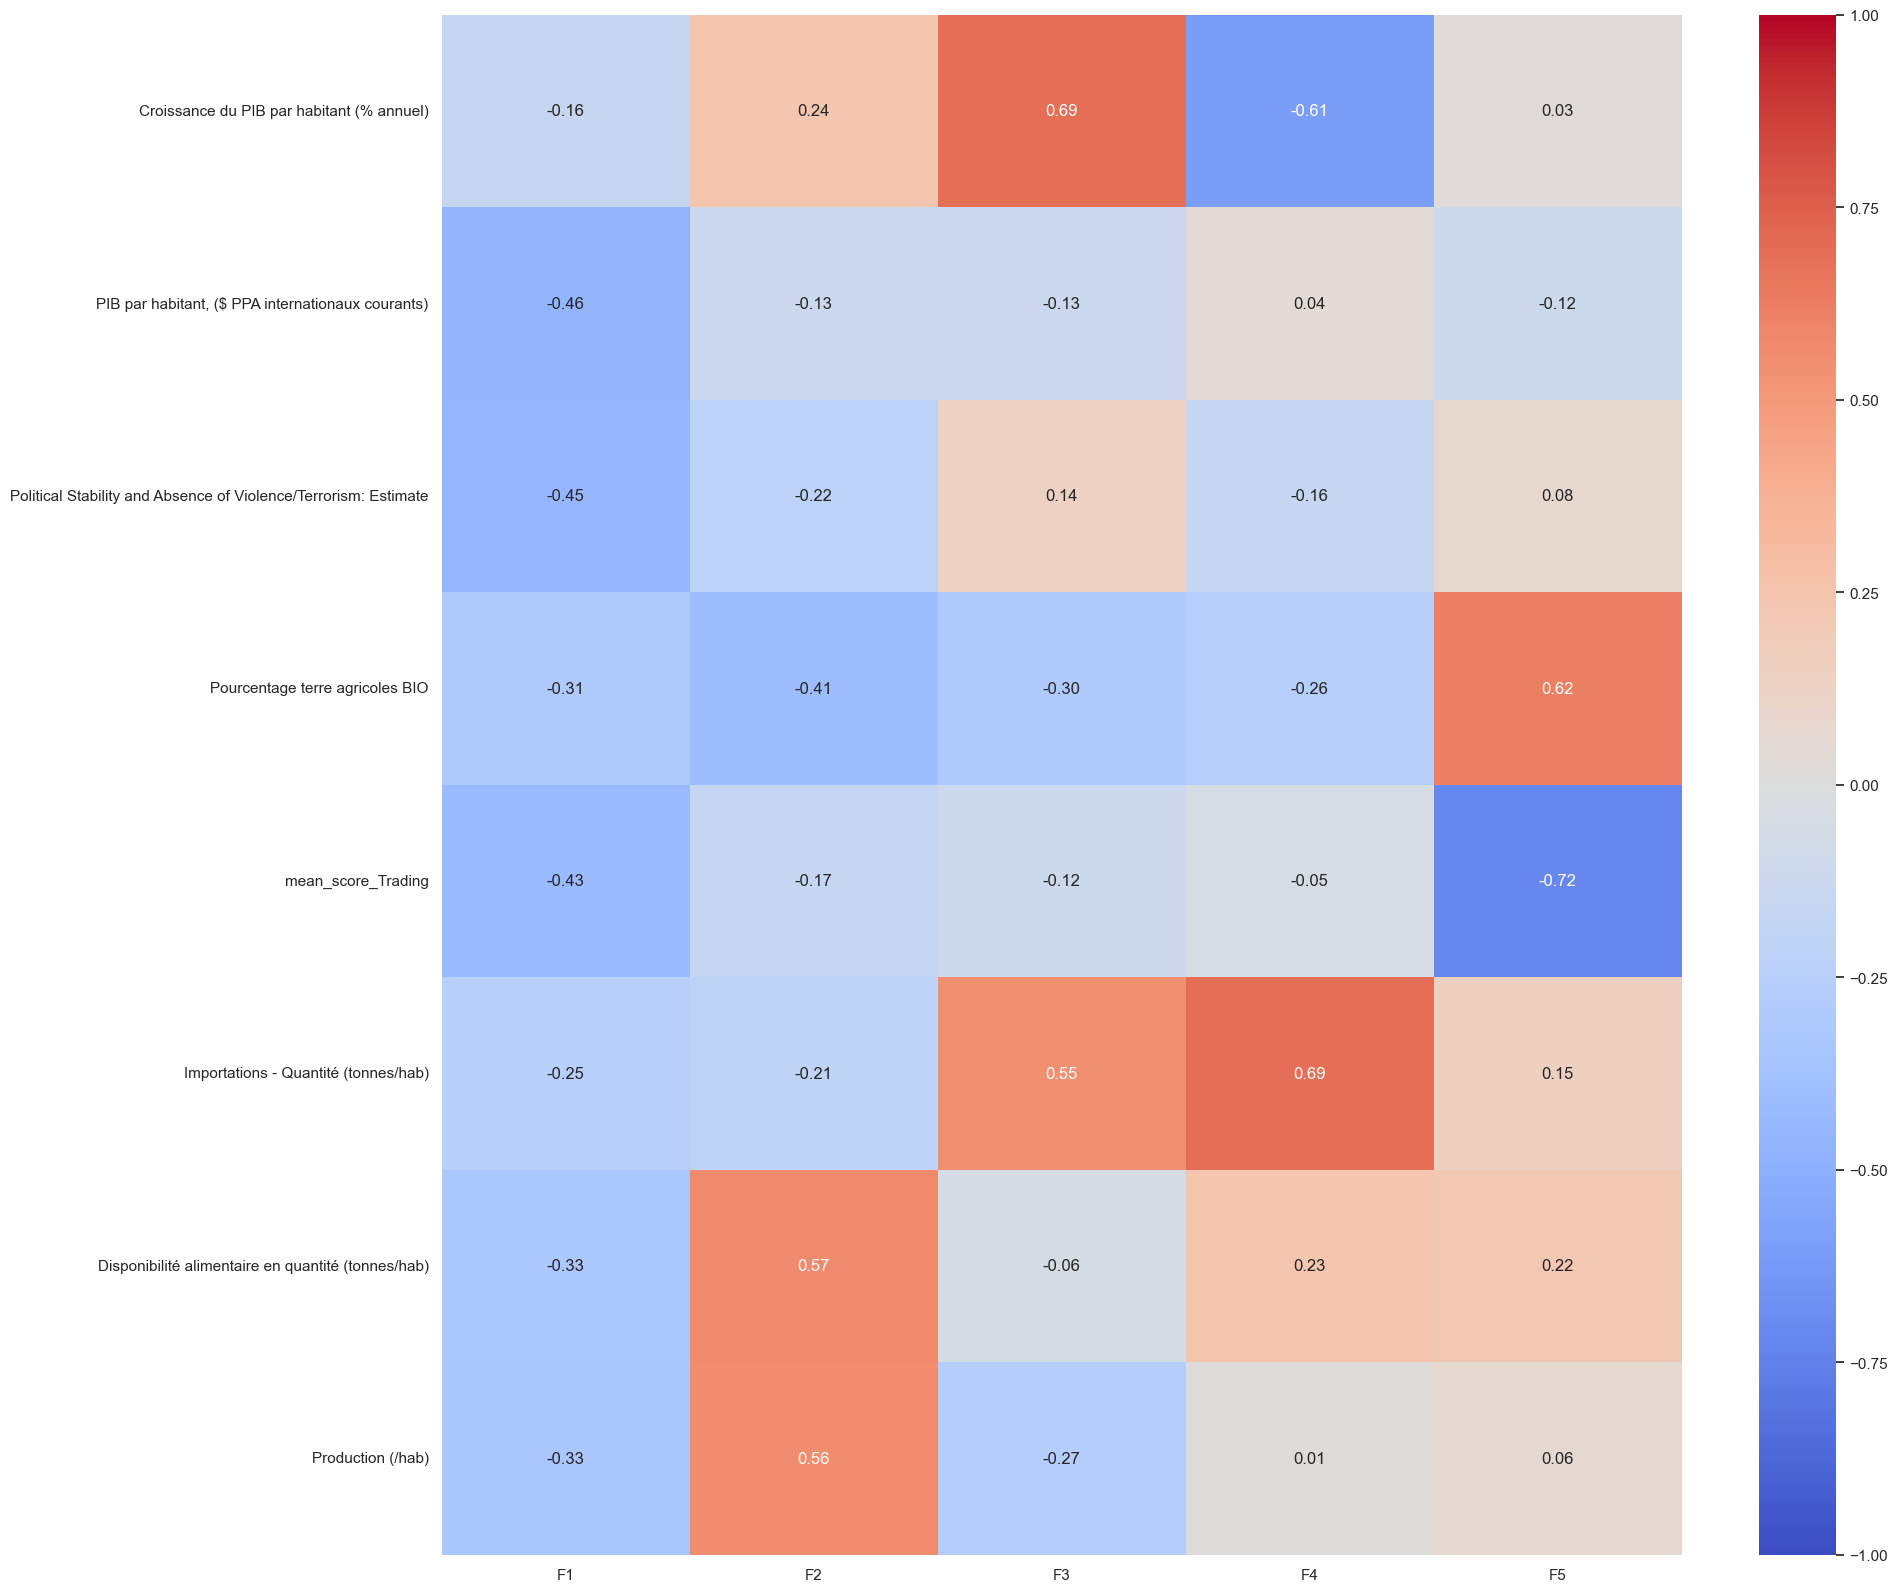

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [73]:
pca_ev = pca.explained_variance_
pca_ev


array([3.11144187, 1.63417723, 1.08315841, 0.77902545, 0.54551965])

In [86]:
# Calculer la contribution des individus
#Affichage des 40 pays les plus contributeurs 
di = np.sum(Complet_scaled_df**2,axis=1)
ctr_indiv_inertie = pd.DataFrame(di, index=names, columns=['Contribution des Pays']).sort_values(by='Contribution des Pays', ascending=False)
ctr_indiv_inertie[:40]

Contribution des Pays
Pays                                         
Bahamas                             45.790105
Timor-Leste                         35.790556
Pays-Bas (Royaume des)              28.524879
Ukraine                             26.166798
Luxembourg                          24.829126
Autriche                            22.329559
Cameroun                            20.266846
Israël                              19.881456
Fidji                               19.362972
Irlande                             19.132333
Soudan                              18.020791
Estonie                             17.928782
Norvège                             14.239176
États-Unis d'Amérique               14.144741
Mali                                14.106986
Brésil                              13.993554
Éthiopie                            13.955699
Australie                           13.781146
Burundi                             13.743375
Suède                               13.300144
Égypte                              13.118290
Bangladesh                          12.120846
Panama                              12.007998
Argentine                           11.619086
Uruguay                             10.691918
Suisse                              10.620928
Malaisie                            10.616574
Lettonie                            10.610669
Bélarus                             10.517776
Italie                               9.598302
Pologne                              9.472606
Belgique                             9.365706
Maurice                              9.199825
Arménie                              9.192583
Finlande                             8.806640
Tchéquie                             8.700940
Burkina Faso                         8.698019
Arabie saoudite                      8.135227
Danemark                             7.969296
Haïti                                7.826676

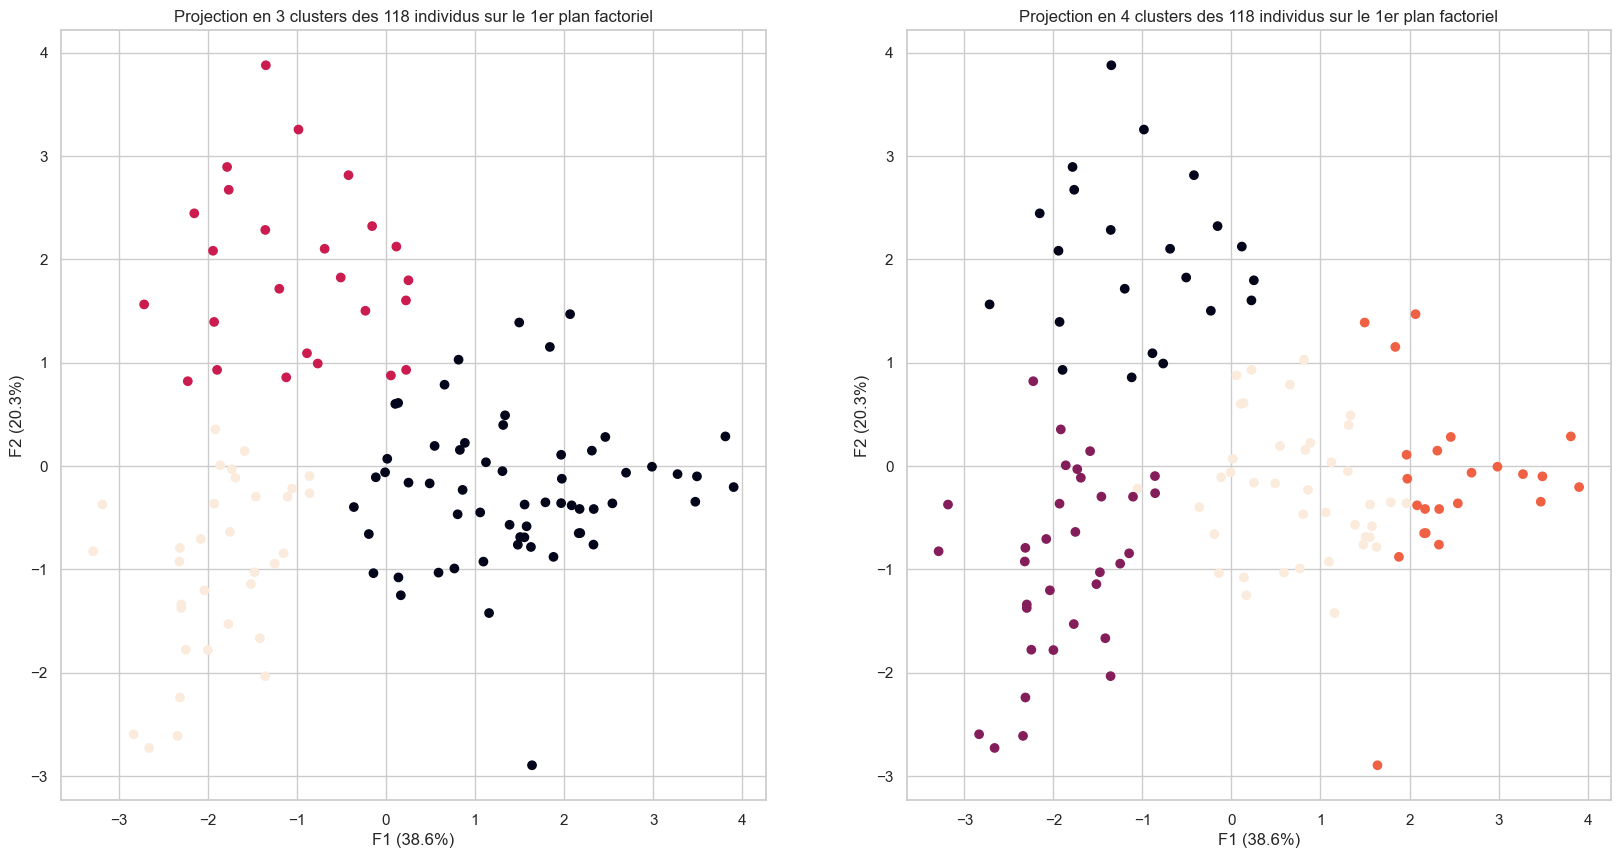

In [75]:
#Coordonnées factorielles 
X_projected = pca.transform(Complet_scaled_df)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans3)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans4)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.show()

In [104]:
x, y = 0,1

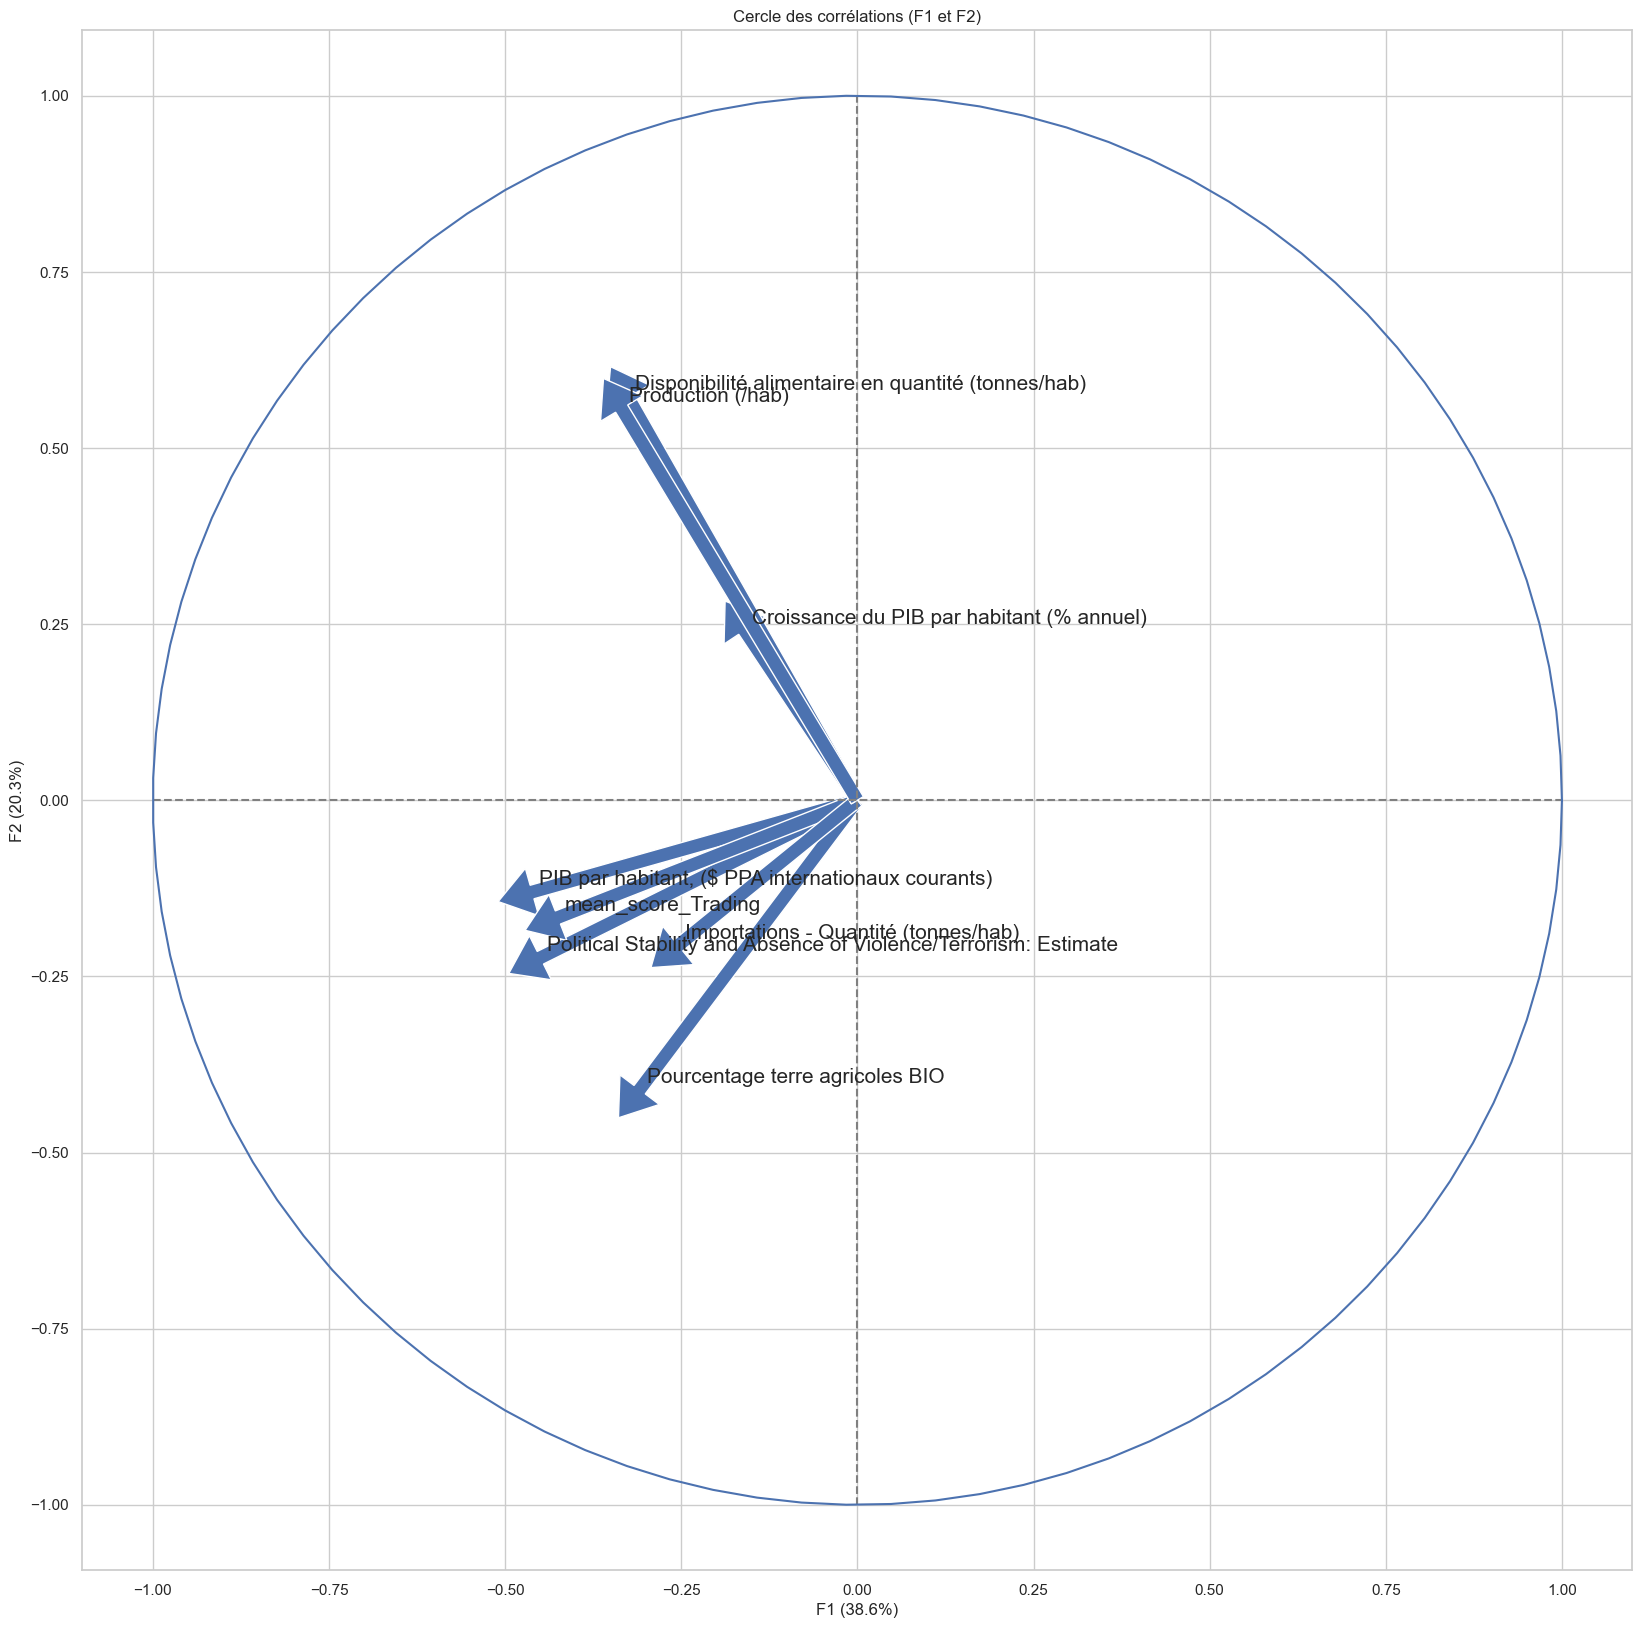

In [108]:
fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.05,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.01,
             pca.components_[1, i] + 0.01,
             features[i],
             fontsize=15)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [100]:
x, y = 2,3

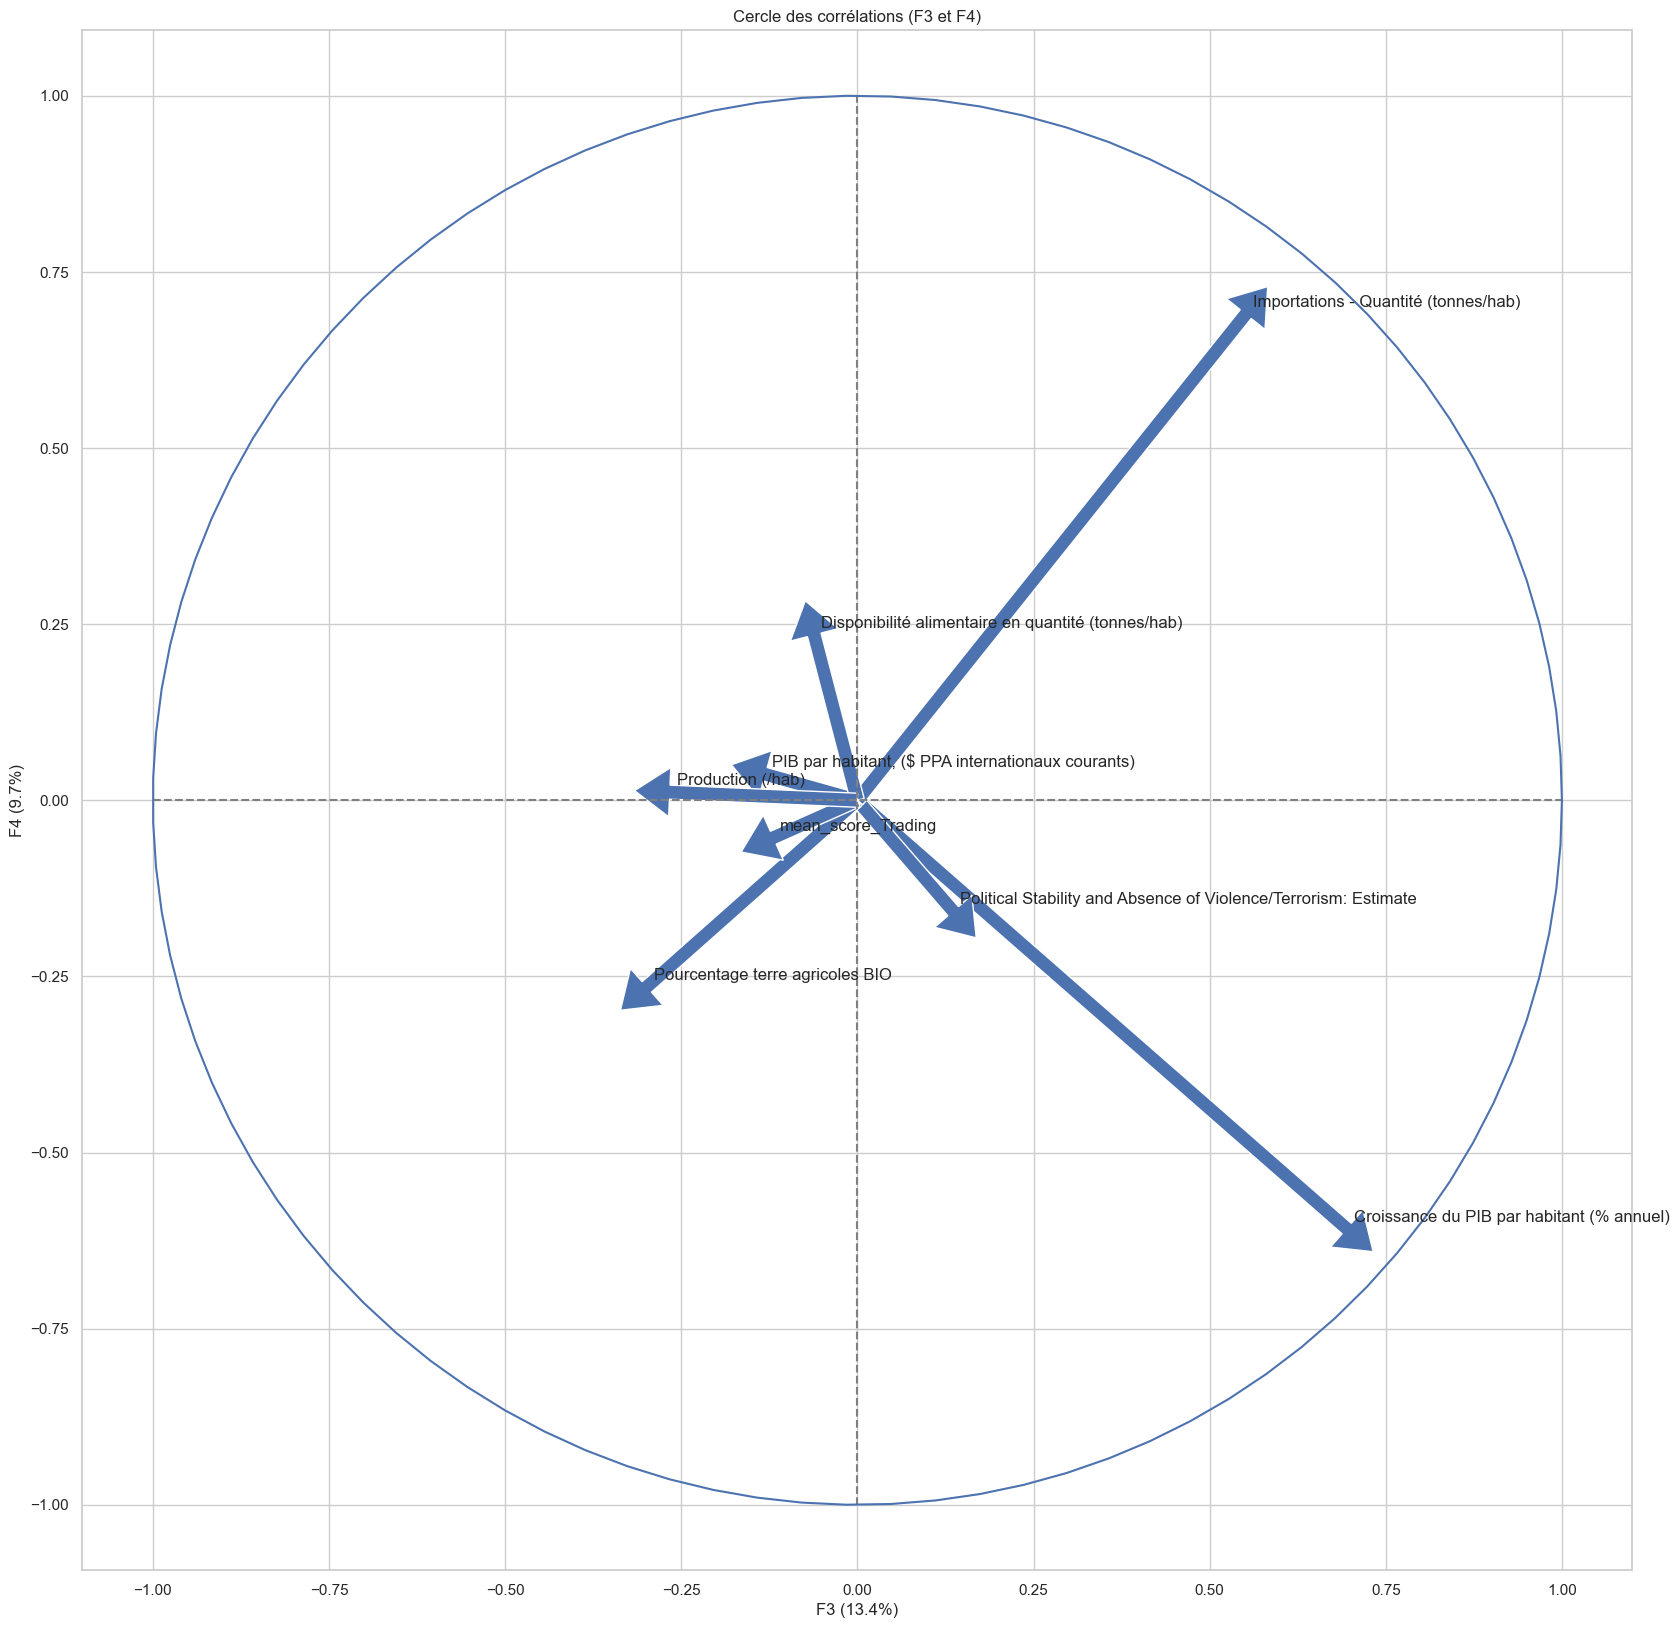

In [101]:
fig, ax = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.05,
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.01,
             pca.components_[3, i] + 0.01,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [96]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color="black"))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor="black")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, c=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, c=c,)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des pays (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, edgecolor="grey")
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=True)

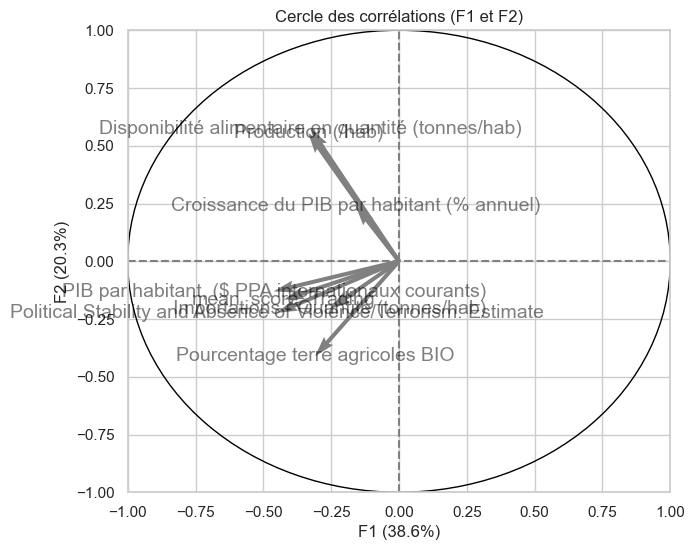

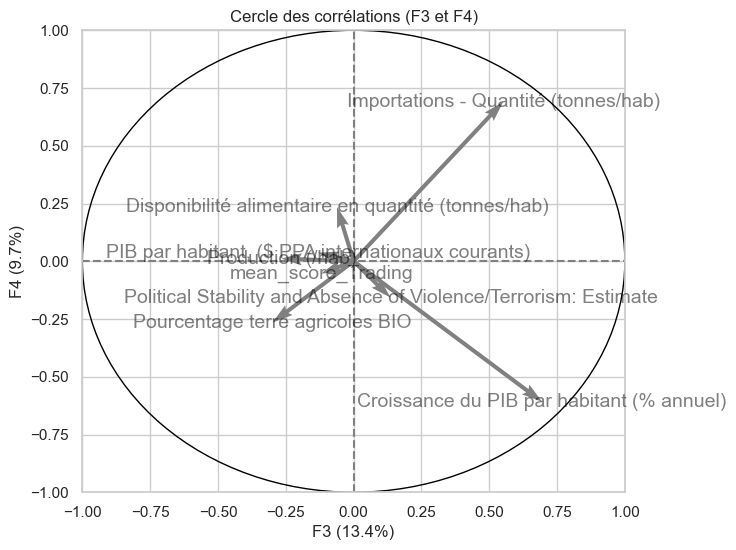

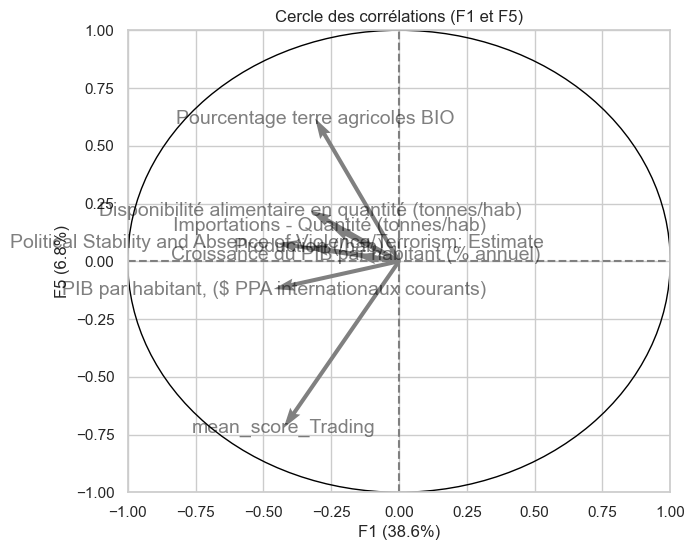

In [97]:
# Cercle des correlations
pcs = pca.components_
display_circles(pcs, n_components, pca, [(0,1),(2,3),(0,4)], labels = features)
plt.show()

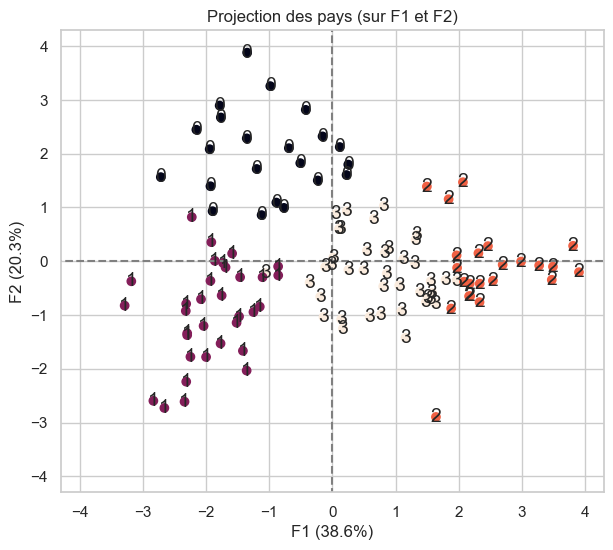

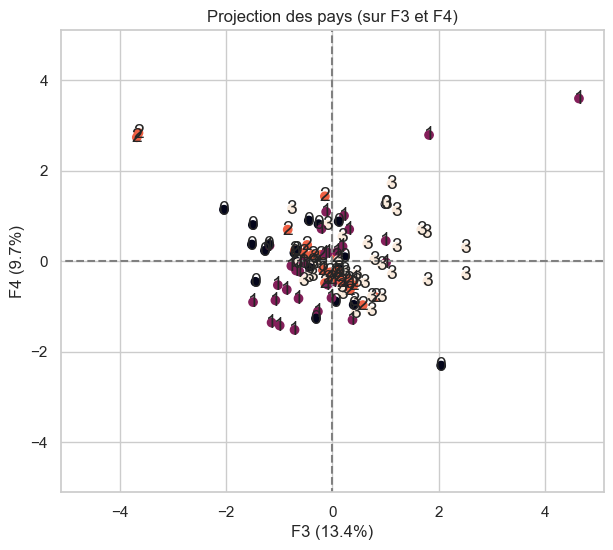

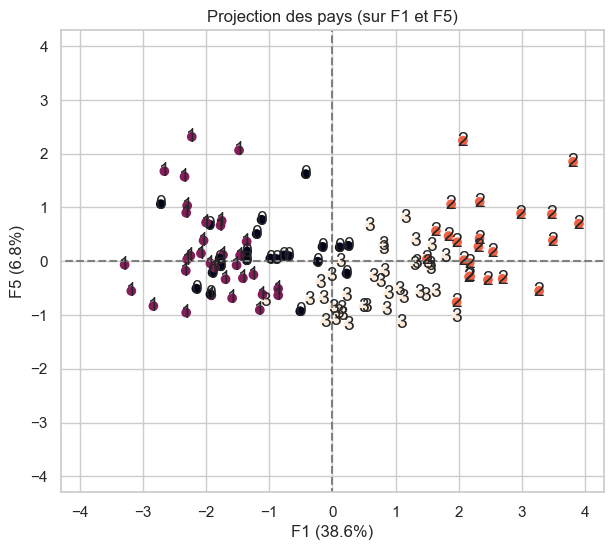

In [89]:
# Projection des pays sur les deux premiers plans de l'ACP (Kmeans_4) 
Complet_projected = pca.transform(Complet_scaled_df)
display_factorial_planes(Complet_projected, n_components, pca, [(0,1),(2,3),(0,4)],labels= clusters_kmeans4, c=clusters_kmeans4)
plt.show()

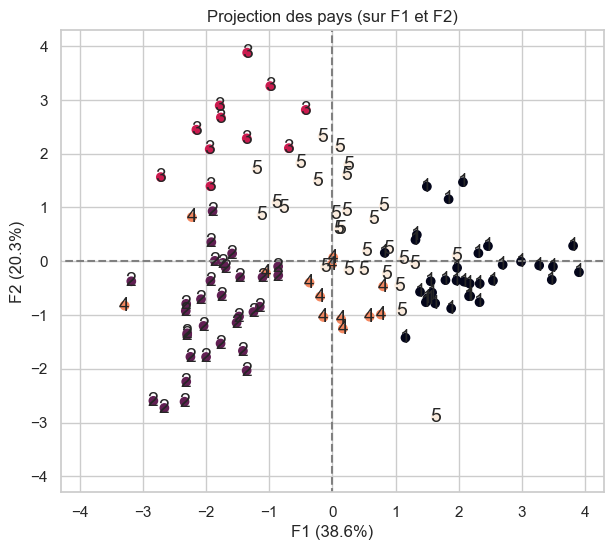

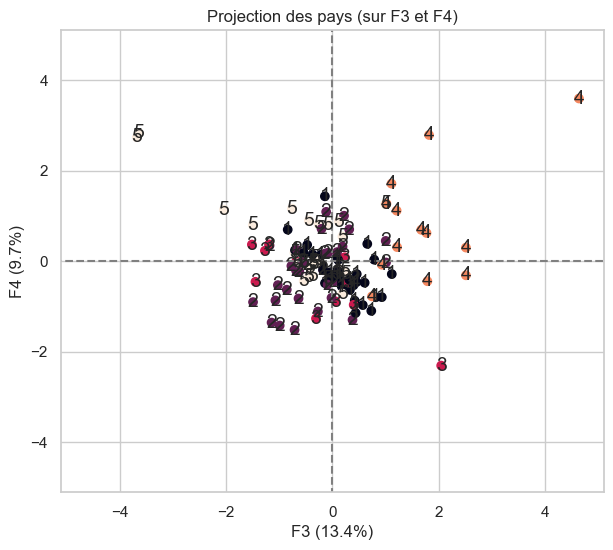

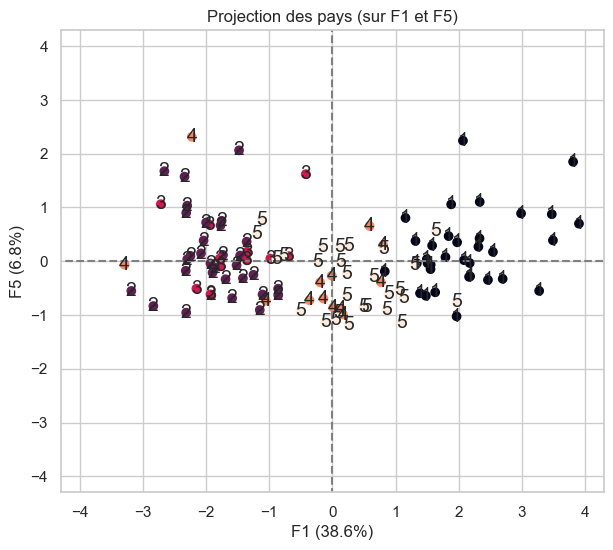

In [90]:
# Projection des pays sur les deux premiers plans de l'ACP (CHA) 
Complet_projected = pca.transform(Complet_scaled_df)
display_factorial_planes(Complet_projected, n_components, pca, [(0,1),(2,3),(0,4)],labels= cluster_cah, c=cluster_cah)
plt.show()

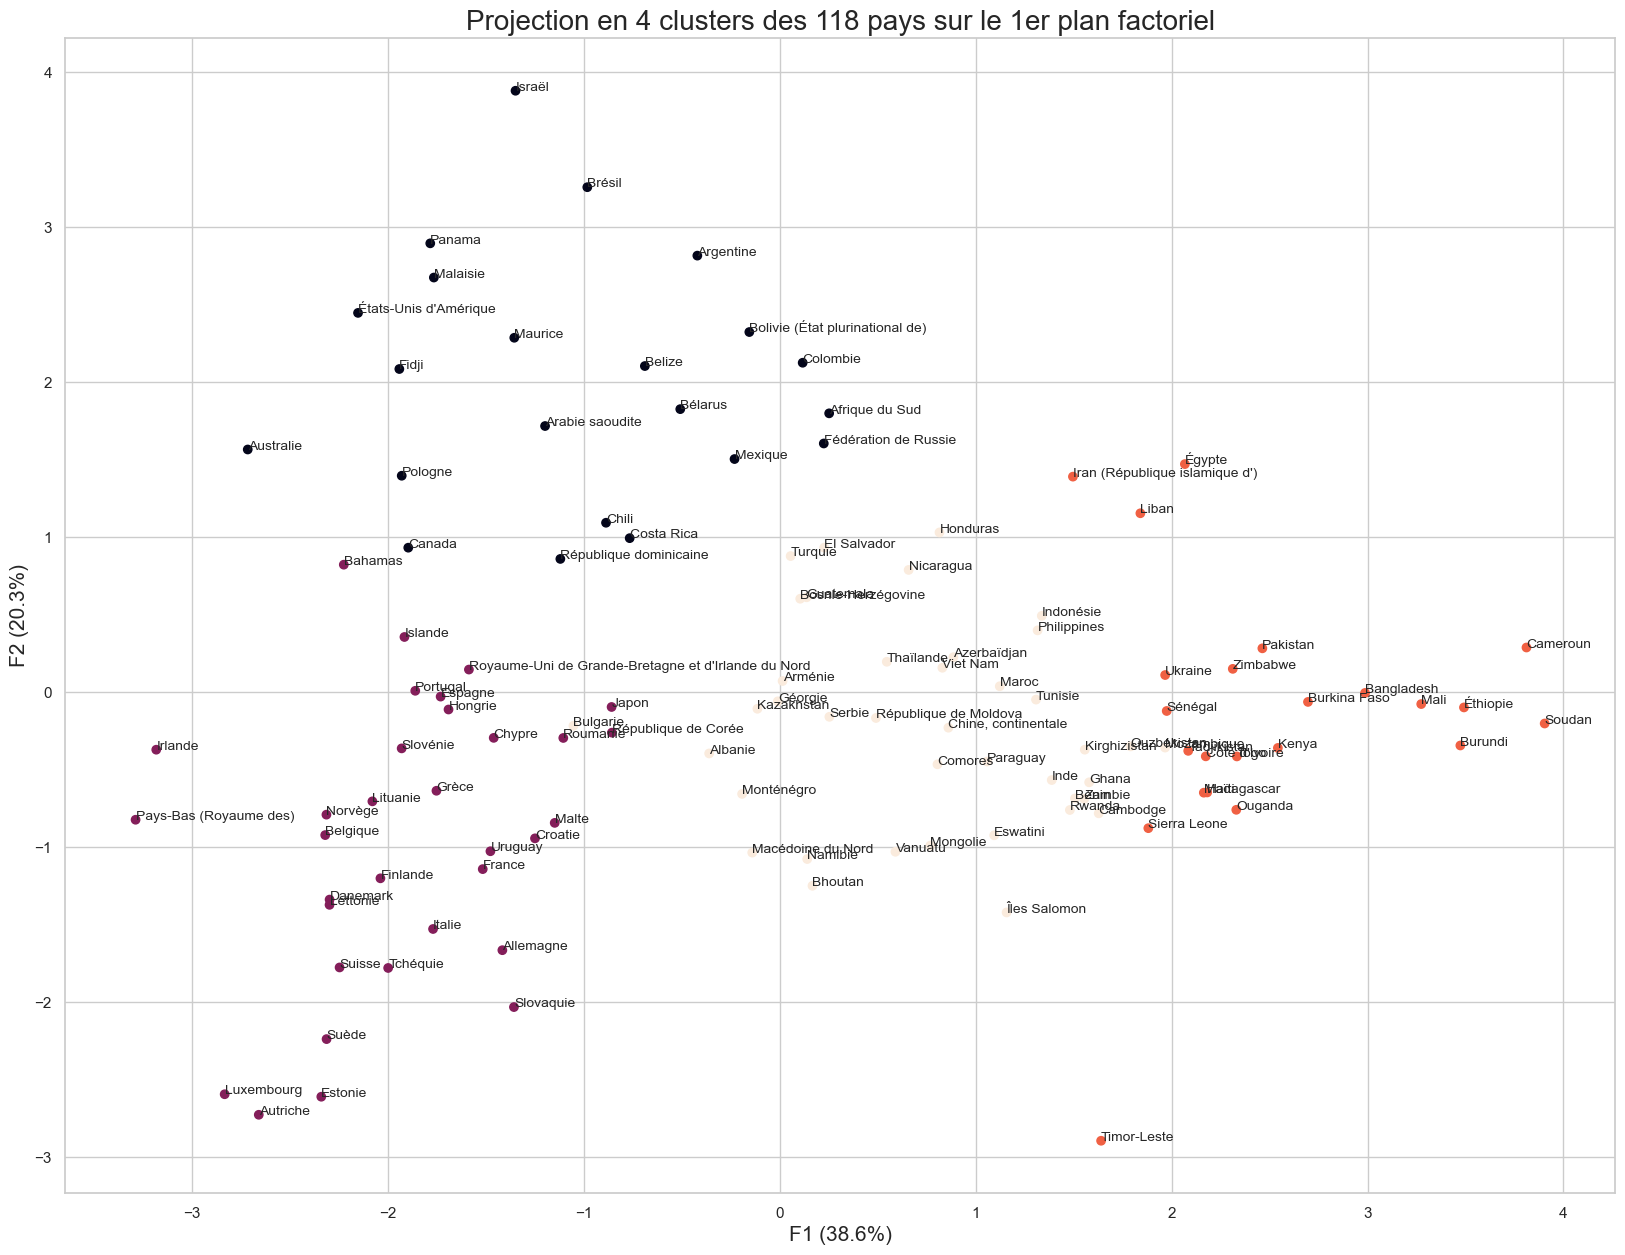

In [87]:
#Projection des 4 clusters sur le premier plan factoriel (F1, F2)
#Coordonnées factorielles 

plt.figure(figsize=(20, 15))

plt.scatter(Complet_projected[:, 0], Complet_projected[:, 1], c=clusters_kmeans4)
for i,(x,y) in enumerate(Complet_projected[:,[0,1]]):
                    plt.text(x, y, names[i], fontsize='10') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} pays sur le 1er plan factoriel".format(Complet_projected.shape[0]), fontsize=20)

plt.show()